## <u>***Business Understanding***</u>

## <center>**Project Title**</center> 
## <center><u>***TimeSeries Analysis (Corporation Favorita)***</u></center> 

## **1.**<u>**Business Understanding**</u>
### *Project Description:*

##### This project focuses on enhancing Corporation Favorita's inventory management through accurate product demand forecasting. Leveraging machine learning models and historical sales data, we aim to optimize inventory levels, minimize stockouts, and maximize profitability. By integrating advanced forecasting techniques into Corporation Favorita's operations, we seek to ensure always right quantity of product in stock. Through this data-driven approach, we aim to provide Corporation Favorita with actionable insights to make informed inventory management decisions and maintain a competitive edge in the retail industry.

### *Problem Statement:*

#### Corporation Favorita faces the challenge of maintaining optimal inventory levels across its retail network to meet customer demand while minimizing stockouts and excess inventory costs. To address this challenge, this project aims to develop machine learning models capable of accurately forecasting product demand

### *Objective:*

#### Create machine learning models to accurately predict product demand in various locations where Corporation Favorita retails are located and enhance profitability.

### *Technology and Tools:*
#### 1.Programming Languages: Python (for data analysis and modeling).
#### 2.Libraries: Pandas, NumPy, scikit-learn, etc .
#### 3.bVisualization: Matplotlib, Seaborn.
#### 4.Development Environment: Jupyter Notebook.
#### 5.Version Control: Git with GitHub/GitLab.

### *Business Success Criteria:*

#### Achieving a specified level of accuracy in predicting product demand compared to actual sales data, measured using metrics like Mean Absolute Percentage Error (MAPE) or Root Mean Squared Logarithmic Error(RMSLE). i.e RMSLE<=0.2

### *Risks and Contingencies:*

#### Data Quality:
Risk: Inaccurate or incomplete data.
Contingency: Implement data validation and cleaning processes.
#### Model Overfitting:
Risk: Models capturing noise instead of patterns.
Contingency: Use regularization techniques and cross-validation.
#### Market Dynamics:
Risk: Shifts in consumer behavior.
Contingency: Monitor data patterns and update models regularly.
#### Technological Challenges:
Risk: Software compatibility issues.
Contingency: Maintain documentation and backup solutions.
#### Stakeholder Acceptance:
Risk: Resistance to new methods.
Contingency: Engage stakeholders and provide clear explanations.
#### Regulatory Compliance:
Risk: Non-compliance with regulations.
Contingency: Ensure data security and involve legal teams.
#### Resource Constraints:
Risk: Limited budget or time.
Contingency: Prioritize tasks, consider outsourcing, and monitor resource allocation.






### **Hypothesis:**
#### (H0) Null Hypothesis: There is no significant relationship between items onpromotion and sales. 
#### (H1) Alternative Hypothesis: There is  significant relationship between items onpromotion and sales.

### **Business Questions:**
1. Is the train dataset complete (has all the required dates)?
2. Which dates have the lowest and highest sales for each year (excluding days the store was closed)?
3. Compare the sales for each month across the years and determine which month of which year had the highest sales.
4. Did the earthquake impact sales?
5. Are certain stores or groups of stores selling more products? (Cluster, city, state, type)
6. Are sales affected by promotions, oil prices and holidays?
7. What analysis can we get from the date and its extractable features?
8. Which product family and stores did the promotions affect.
9. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)
10. Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.


| Feature    | Definition                |
|------------|---------------------------|
|Date        |day which sale has been made   |
|Store_nbr | Unique identifier of a store where a sale has been done|
|Family | type of a product that is sold |
|Sales | The total amount of a particular family product|
|Onpromotion | number of family products that were on promotion |
|Transaction | sales made on a specific date |
|City | location of the store |
|State |State which store is located  |
|Cluster |stores grouped with similarity|
|oil price |cost of oil |
|Type |the type of day can be holiday,bridge,workday |
|Transfer |a day that was supposed to be holiday but the holiday moved to another day |
|Locale |location a holiday is being calebrated  |
|locale_name |The name of location |
| Description |describes the day or holiday |

In [210]:
# LOADING LIBRARIES

# For data manipulation
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import joblib 

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.dates import YearLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import re
#import calmap
import itertools

## for analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from scipy.stats import ttest_ind
from statsmodels.tsa.stattools import zivot_andrews

## Statistical analysis
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss, zivot_andrews
from scipy.stats import kendalltau,ttest_ind

## MODELLING 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skforecast.ForecasterSarimax import ForecasterSarimax
from sklearn.metrics import make_scorer


# for database connection
import pyodbc
from dotenv import dotenv_values
import os

# Filter warnings
import warnings
warnings.filterwarnings("ignore")
print("loading complete")

loading complete


#### *Creating connection with the database*

In [7]:
## loading environmental variables from .env
environment_variables = dotenv_values(".env")

##Getting values of the credentials set in the .env file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USER")
password = environment_variables.get("PASSWORD")

## creating a connection 
connection_string = f"DRIVER=SQL Server;SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"
connection = pyodbc.connect(connection_string)

## **2.**<u>**Data Understanding**</u>

#### **Loading datasets**

In [8]:
# loading data from SQL database ( table1,table2,table3)
train_df_table1 = "SELECT * FROM dbo.oil" # sql query for accessing table 1
oil_df = pd.read_sql(train_df_table1,connection)

train_df_table2 = "SELECT * FROM dbo.holidays_events"# sql query for accessing table2
holiday_df = pd.read_sql(train_df_table2,connection)

train_df_table3 = "SELECT * FROM dbo.stores"#sql query for accessing table3
stores_df = pd.read_sql(train_df_table3,connection)

# dataSET from GITHUB repository
train_df = pd.read_csv(r"C:\Users\USER\Desktop\LP3_Time_Series\datasets\train.csv") 


transaction_df = pd.read_csv(r"C:\Users\USER\Desktop\LP3_Time_Series\datasets\transactions.csv")

# data from ONEDRIVE FILE N/B used for testing only 
sample_df = pd.read_csv(r"C:\Users\USER\Desktop\LP3_Time_Series\datasets\sample_submission.csv")
test_df = pd.read_csv(r"C:\Users\USER\Desktop\LP3_Time_Series\datasets\test.csv")


In [9]:
train_df = pd.read_csv(r"C:\Users\USER\Desktop\LP3_Time_Series\datasets\train.csv") 

### **Exploratory Data Analysis**

##### **E.D.A for oil_df**

In [10]:
## getting a preview of the dataset
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [11]:
# checking for the datatypes 
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [12]:
## checking for unique values in the date column since some dates are strings 
oil_df['date'].unique()

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2017-08-29',
       '2017-08-30', '2017-08-31'], dtype=object)

In [13]:
## checking for nulls 
oil_df.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [14]:
## checking for duplicates
oil_df.duplicated().sum()

0

In [15]:
## performing descriptive statistics
oil_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,1218,1218,2013-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dcoilwtico,1175.0,NaN,NaN,NaN,67.714366,25.630476,26.190001,46.405001,53.189999,95.66,110.620003


### **Findings**
1. Dataset has only two columns and 1218 rows 
2. date column has the wrong datatype 
3. oil_price column has 43 missing values
4. There are no duplicates in the dataset 


### **course of action**
1. Set the correct datatype to the date column using pd.to_datetime(table1['date'].dt.date)
2. set the date column as the index 
3. fill the missing values 


In [16]:
## rename the column dcoilwtico to oil_price
oil_df['oil_price'] = oil_df['dcoilwtico']

In [17]:
### filling the missing values 
oil_df['oil_price'].interpolate(method='linear',inplace=True)

In [18]:
### confirming if there are still nulls
oil_df.isnull().sum()

date           0
dcoilwtico    43
oil_price      1
dtype: int64

In [19]:
## filling the first null with the mean
oil_df['oil_price'].fillna(oil_df['oil_price'].mean(),inplace=True)

In [20]:
### confirming if there are still nulls
oil_df.isnull().sum()

date           0
dcoilwtico    43
oil_price      0
dtype: int64

In [21]:
oil_df= oil_df.drop(columns=['dcoilwtico'])

In [22]:
### removing the quotations marks from the date column 
oil_df['date'] = oil_df['date'].str.replace("'", '')

# Convert to datetime datatype using pd.to_datetime()
#table2['date'] = pd.to_datetime(table2['date'])

In [23]:
### correcting the datatype of the date column
oil_df['date'] = pd.to_datetime(oil_df['date'], infer_datetime_format=True)

##### **E.D.A for holiday_df**

In [24]:
## getting a preview of the data
holiday_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [25]:
## checking for missing values and datatypes
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [26]:
## checking for duplicates
holiday_df.duplicated().sum()

0

In [27]:
holiday_df.describe(include='all').T

,count,unique,top,freq
date,350,312,2014-06-25,4
type,350,6,Holiday,221
locale,350,3,National,174
locale_name,350,24,Ecuador,174
description,350,103,Carnaval,10
transferred,350,2,False,338


In [28]:
## checking for unique values
holiday_df.nunique() 

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [29]:
## checking the values in the date column
#table2['date'].unique()

### **Findings**
1. The dataset has 6 columns and 350 rows 
2. date column has the wrong datatype
3. There are no missing values 
4. There are no duplicates 


### **Course of Action**
1. Remove the quotation marks from the date values 
2. Correct the date column datatype using pd.to_datetime(table2['date'].dt.date)
3. set the date column as the index


In [30]:
### removing the quotations marks from the date column 
holiday_df['date'] = holiday_df['date'].str.replace("'", '')

# Convert to datetime datatype using pd.to_datetime()
#table2['date'] = pd.to_datetime(table2['date'])


In [31]:
### correcting the datatype of the date column
holiday_df['date'] = pd.to_datetime(holiday_df['date'], infer_datetime_format=True)


In [32]:
## checking for completeness
start_day = holiday_df['date'].min()
end_day = holiday_df['date'].max()

In [33]:
date_range = pd.date_range(start=start_day,end=end_day,freq='D')

In [34]:
existing_date = holiday_df['date']
missing_date = date_range.difference(existing_date)

In [35]:
missing_date

DatetimeIndex(['2012-03-03', '2012-03-04', '2012-03-05', '2012-03-06',
               '2012-03-07', '2012-03-08', '2012-03-09', '2012-03-10',
               '2012-03-11', '2012-03-12',
               ...
               '2017-12-11', '2017-12-12', '2017-12-13', '2017-12-14',
               '2017-12-15', '2017-12-16', '2017-12-17', '2017-12-18',
               '2017-12-19', '2017-12-20'],
              dtype='datetime64[ns]', length=1814, freq=None)

### **univariate analysis**

In [36]:
holiday_df.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

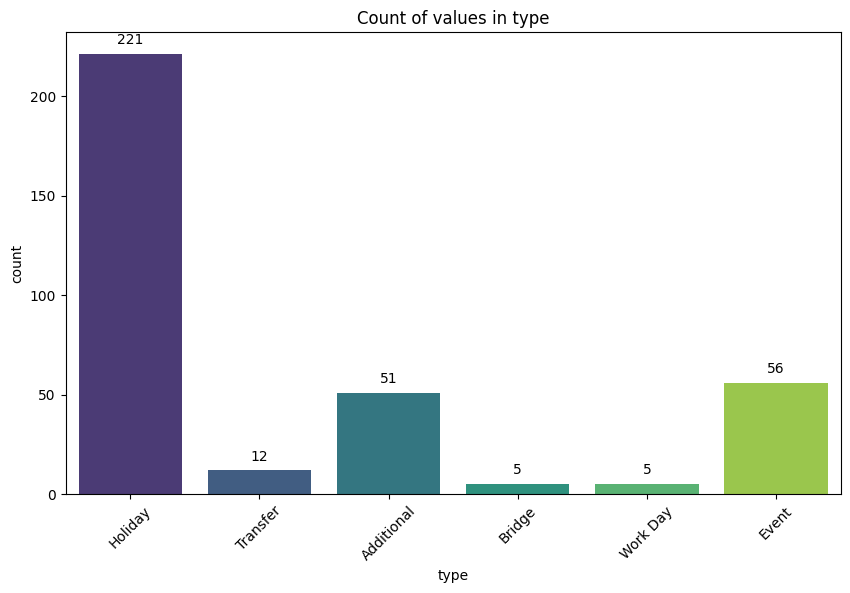

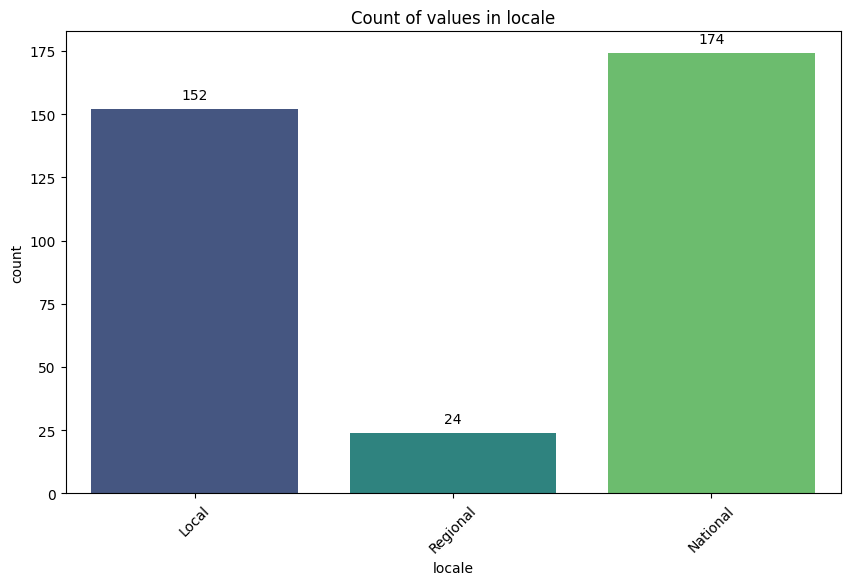

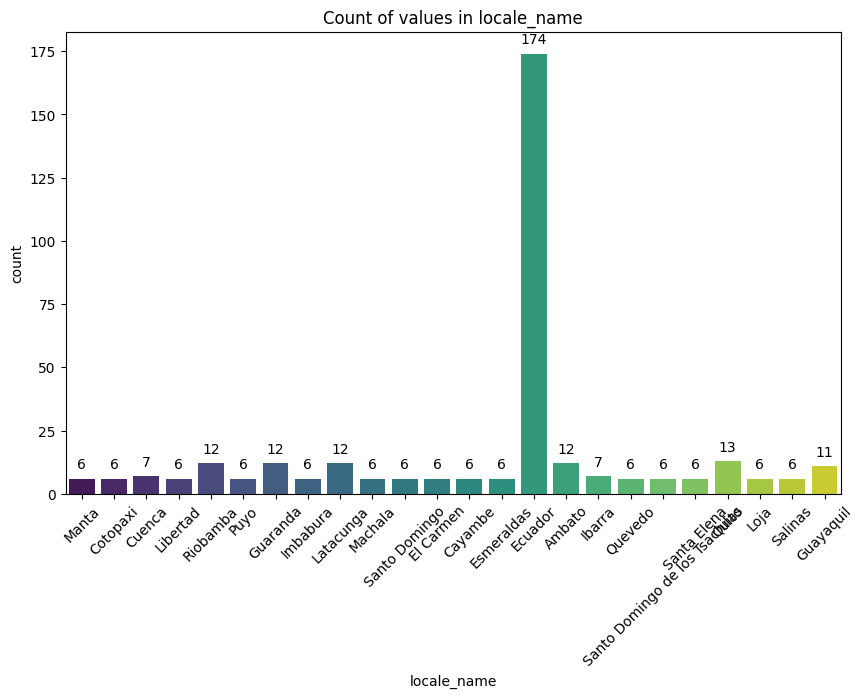

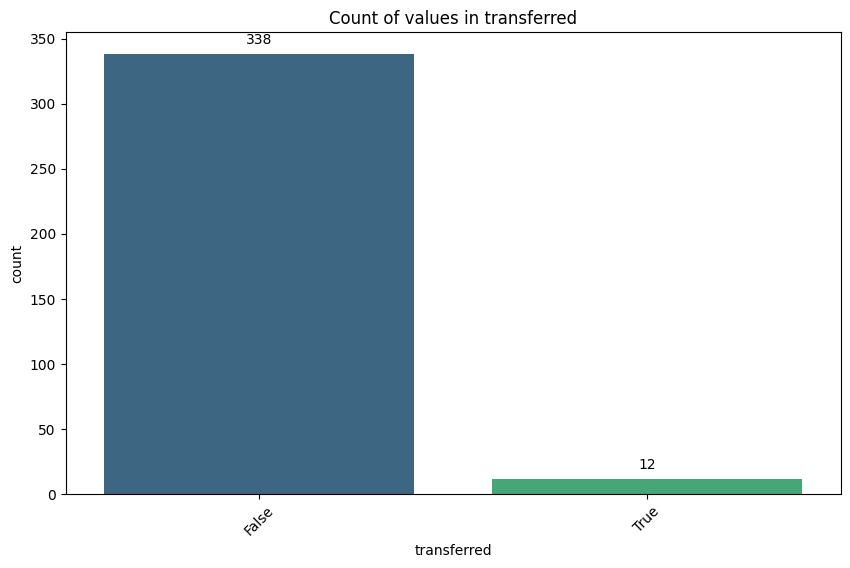

In [37]:
data = ['date', 'description']
for column in holiday_df.drop(data, axis=1).columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    ax = sns.countplot(x=column, data=holiday_df, palette="viridis")
    plt.title(f"Count of values in {column}")
    plt.xticks(rotation=45)
    
    # Add annotations to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
    
    plt.show()

### **E.D.A for the stores DF**

In [38]:
## getting a preview of the stores df
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [39]:
## checking for nulls and the datatypes
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [40]:
# checking if there are duplicates 
stores_df.duplicated().sum()

0

In [41]:
## getting the unique values for each column
stores_df.nunique()

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

In [42]:
stores_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
store_nbr,54.0,NaN,NaN,NaN,27.5,15.732133,1.0,14.25,27.5,40.75,54.0
city,54,22,Quito,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,54,16,Pichincha,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,54,5,D,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,54.0,NaN,NaN,NaN,8.481481,4.693395,1.0,4.0,8.5,13.0,17.0


#### **Univariate Analysis**

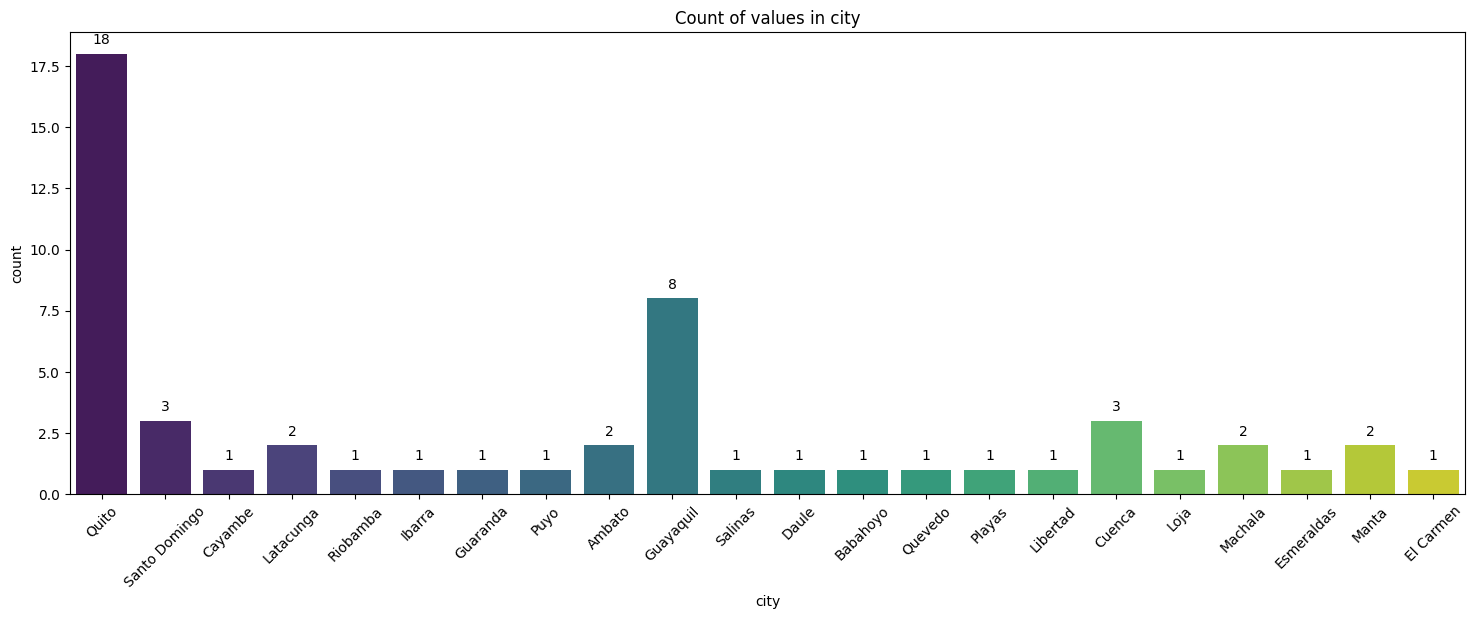

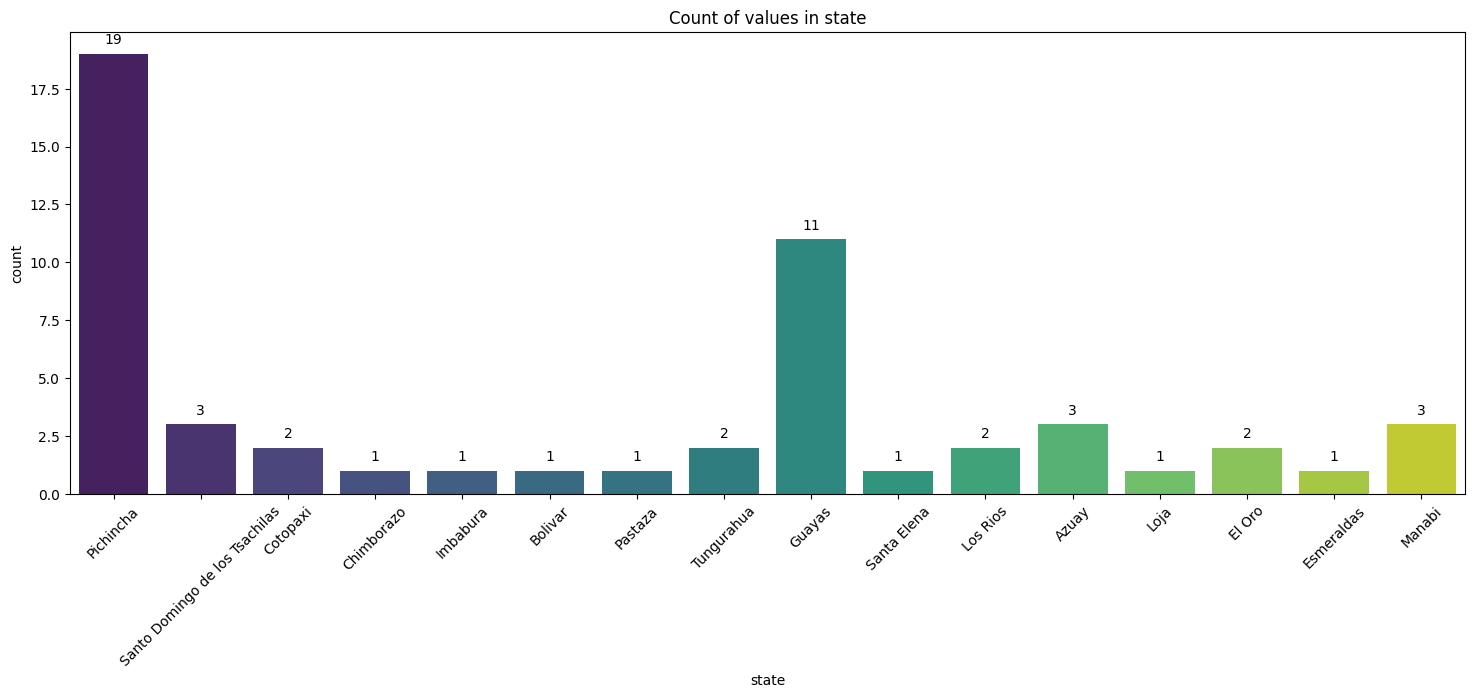

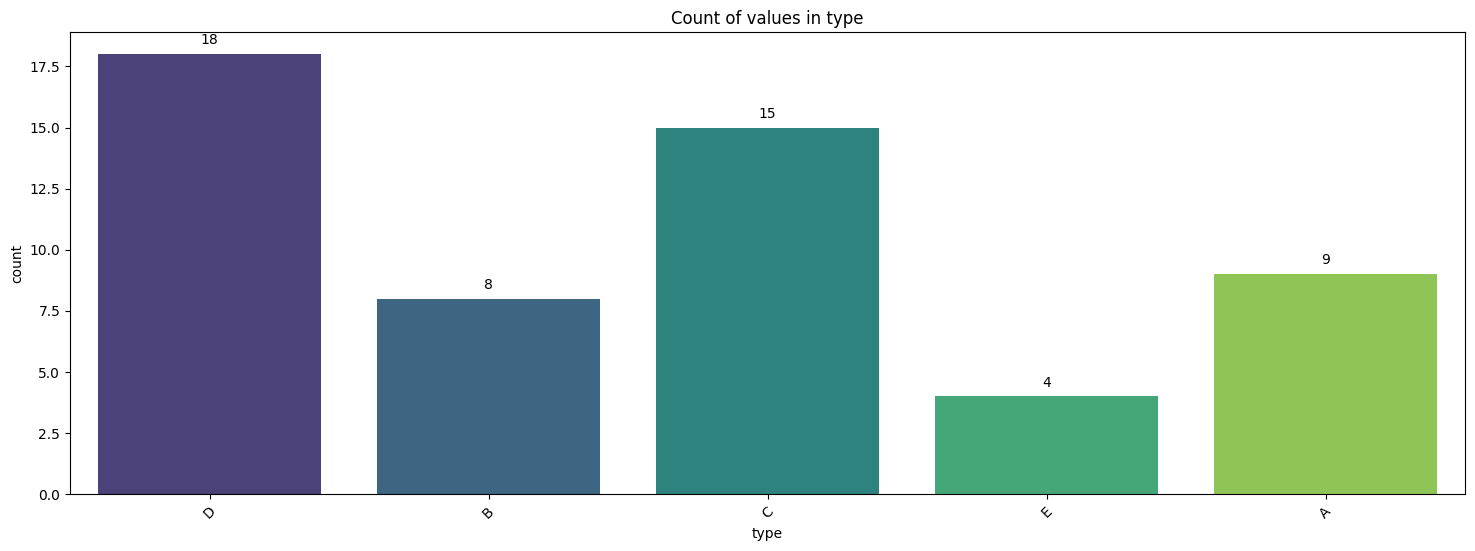

In [43]:
store_df = stores_df.drop(columns=["cluster","store_nbr"])
for column in store_df.columns:#drop('cluster','store_nbr', axis=1).columns:
    plt.figure(figsize=(18, 6))  # Adjust figure size if needed
    ax = sns.countplot(x=column, data=stores_df, palette="viridis")
    plt.title(f"Count of values in {column}")
    plt.xticks(rotation=45)
    
    # Add annotations to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
    
    plt.show()

### **BI-Variate analysis**

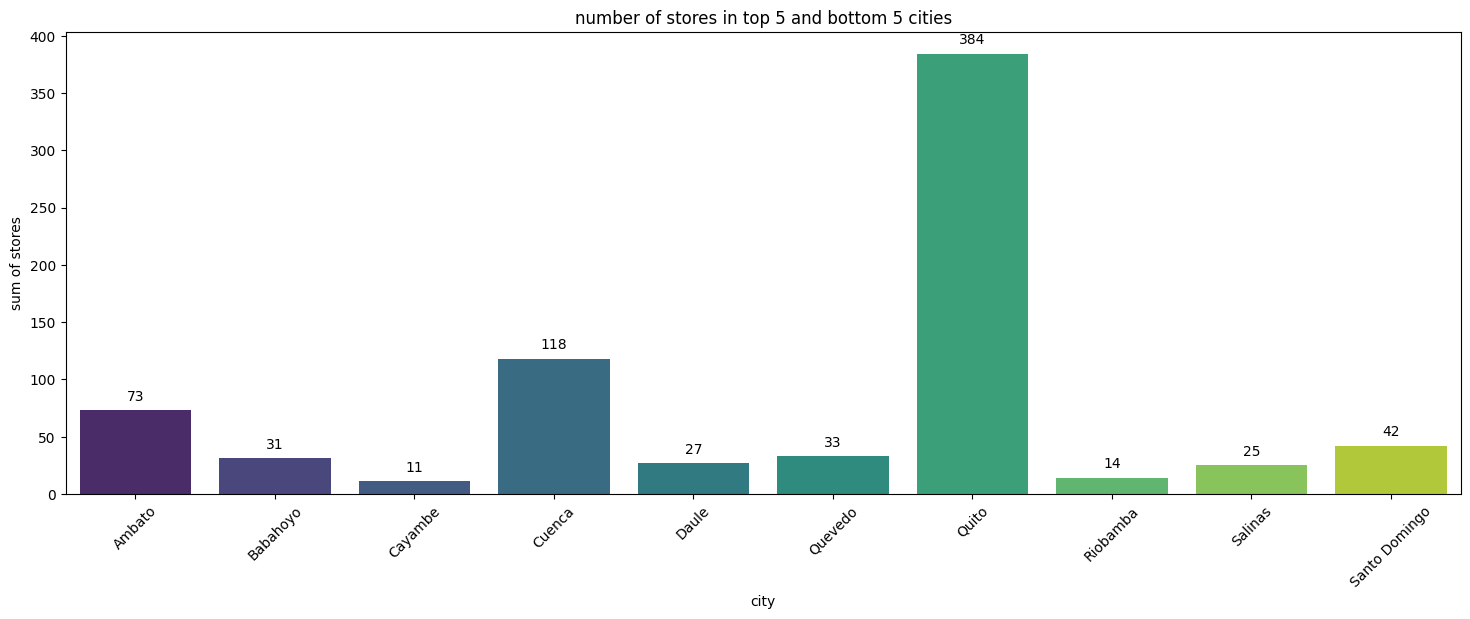

In [44]:
## grouping the stores and city
store_city = stores_df.groupby(by=['city'])['store_nbr'].sum()
#sns.barplot(data=store_city)
## getting the top 5 and bottom 5 i.e cities with most stores and cities with less stores
store_city.head(5)
store_city.tail(5)
## joining the top5 and botom5
city_store = pd.concat([store_city.head(5),store_city.tail(5)])
## plotting the cities with the number of stores
plt.figure(figsize=(18,6))
ax = sns.barplot(data=city_store,palette="viridis")
plt.title('number of stores in top 5 and bottom 5 cities')
# Add annotations to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.ylabel('sum of stores')
plt.xticks(rotation=45)
plt.show()


### **Findings**
- The dataset has 54 rows and 5 columns 
- Has no missing values 
- Has no duplicates
- Most stores were located at Quito city and Pichincha state
-  Data has no issues

## **E.D.A for Train_df** 

In [45]:
##getting a preview of the dataset
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [46]:
## getting the nulls and datatypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [47]:
##check for nulls 
train_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [48]:
## check for duplicates
train_df.duplicated().sum()

0

In [49]:
## checking for unique values
train_df.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

In [50]:
## getting descriptive statistics
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3000888.0,NaN,NaN,NaN,1500443.5,866281.891642,0.0,750221.75,1500443.5,2250665.25,3000887.0
date,3000888,1684,2013-01-01,1782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_nbr,3000888.0,NaN,NaN,NaN,27.5,15.585787,1.0,14.0,27.5,41.0,54.0
family,3000888,33,AUTOMOTIVE,90936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales,3000888.0,NaN,NaN,NaN,357.775749,1101.997721,0.0,0.0,11.0,195.84725,124717.0
onpromotion,3000888.0,NaN,NaN,NaN,2.60277,12.218882,0.0,0.0,0.0,0.0,741.0


### **Findings**
- The dataset has 3000888 rows and 8 columns
- The date column has the wrong datatype 
- There are no nulls 
- There are no duplicates
- There are 33 different types of products
- The highest sale recorded on a single day was 124717 while the lowest was 0
- Automotive was the most common family or type of product sold
- The dataset has missing dates 


### **Course of Action**
- correct the datatype of the date column 
- make the date column the index
- drop the id column as it has no use in the modelling stage 
- add columns for years , month and weekday

In [51]:
## droping the ID column
train_df = train_df.drop(columns=(['id']),axis=1)

In [52]:
## changing the datatype of the date column to datetime
train_df['date'] = pd.to_datetime(train_df['date'])

#### **Checking for completness**

In [53]:
## Check for completness
starting_day = train_df['date'].min()
ending_day = train_df['date'].max()

## setting the range
train_date_range = pd.date_range(start=starting_day,end=ending_day,freq='D')  
#defining the dates 
existing_dates = train_df['date']
## getting the missing dates
missing_date = train_date_range.difference(existing_dates)
missing_date 

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

In [54]:
starting_day
ending_day

Timestamp('2017-08-15 00:00:00')

#### **Filling for the missing dates**

In [55]:
families = train_df['family'].unique()
#families
stores = train_df['store_nbr'].unique()
#stores


In [56]:
### create a new data points with the missing dates 
data_points = list(itertools.product(missing_date, stores, families))
#data_points
## create a new dataframe 
new_df = pd.DataFrame(data=data_points,columns=['date','store_nbr','family'])
new_df

,date,store_nbr,family
0,2013-12-25,1,AUTOMOTIVE
1,2013-12-25,1,BABY CARE
2,2013-12-25,1,BEAUTY
3,2013-12-25,1,BEVERAGES
4,2013-12-25,1,BOOKS
...,...,...,...
7123,2016-12-25,9,POULTRY
7124,2016-12-25,9,PREPARED FOODS
7125,2016-12-25,9,PRODUCE
7126,2016-12-25,9,SCHOOL AND OFFICE SUPPLIES


In [57]:
### concatinating the original train df and new df
train_df = pd.concat([train_df,new_df],axis=0)
train_df.set_index('date',inplace=True)
train_df

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0.0
2013-01-01,1,BABY CARE,0.0,0.0
2013-01-01,1,BEAUTY,0.0,0.0
2013-01-01,1,BEVERAGES,0.0,0.0
2013-01-01,1,BOOKS,0.0,0.0
...,...,...,...,...
2016-12-25,9,POULTRY,NaN,NaN
2016-12-25,9,PREPARED FOODS,NaN,NaN
2016-12-25,9,PRODUCE,NaN,NaN


##### **confirming if there is still missing dates**

In [58]:
starting_day = train_df.index.min()
ending_day = train_df.index.max()

## setting the range
train_date_range = pd.date_range(start=starting_day,end=ending_day,freq='D')  
#defining the dates 
existing_dates = train_df.index
## getting the missing dates
missing_date = train_date_range.difference(existing_dates)
missing_date 

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [59]:
## checking for nulls after concatinatine
train_df.isnull().sum()

store_nbr         0
family            0
sales          7128
onpromotion    7128
dtype: int64

- There are 7128 nulls in the sales column and the onpromotion column
#### **course of action**
- we fill the nulls in the sales column with zeros
- we fill the nulls in the onpromotion column with zeros

In [60]:
## filling the nulls with zeros
train_df['sales'] = train_df['sales'].fillna(0)
train_df['onpromotion'] = train_df['onpromotion'].fillna(0)


In [61]:
### confirming if there are still null values
train_df.isnull().sum()

store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [62]:
## adding column for years
train_df['year'] = train_df.index.year

## adding column for months
train_df['month'] = train_df.index.month
train_df['month_name'] = train_df.index.month_name()

## adding column for weekday
train_df['week_day'] = train_df.index.day

## adding the day_name
train_df['day_name'] = train_df.index.day_name()

#### **Univariate Analysis**

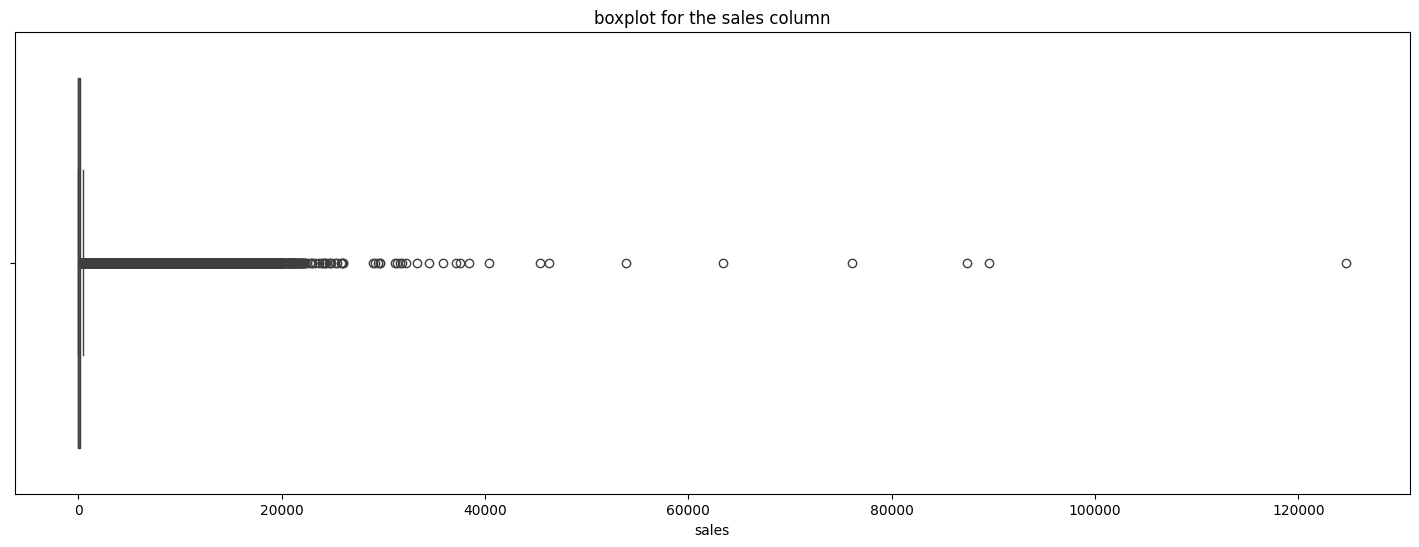

In [63]:
## check for outliers using boxplot
plt.figure(figsize=(18,6))
sns.boxplot(train_df['sales'],orient='h')
plt.title('boxplot for the sales column')
plt.show()

- The sales data has outliers 

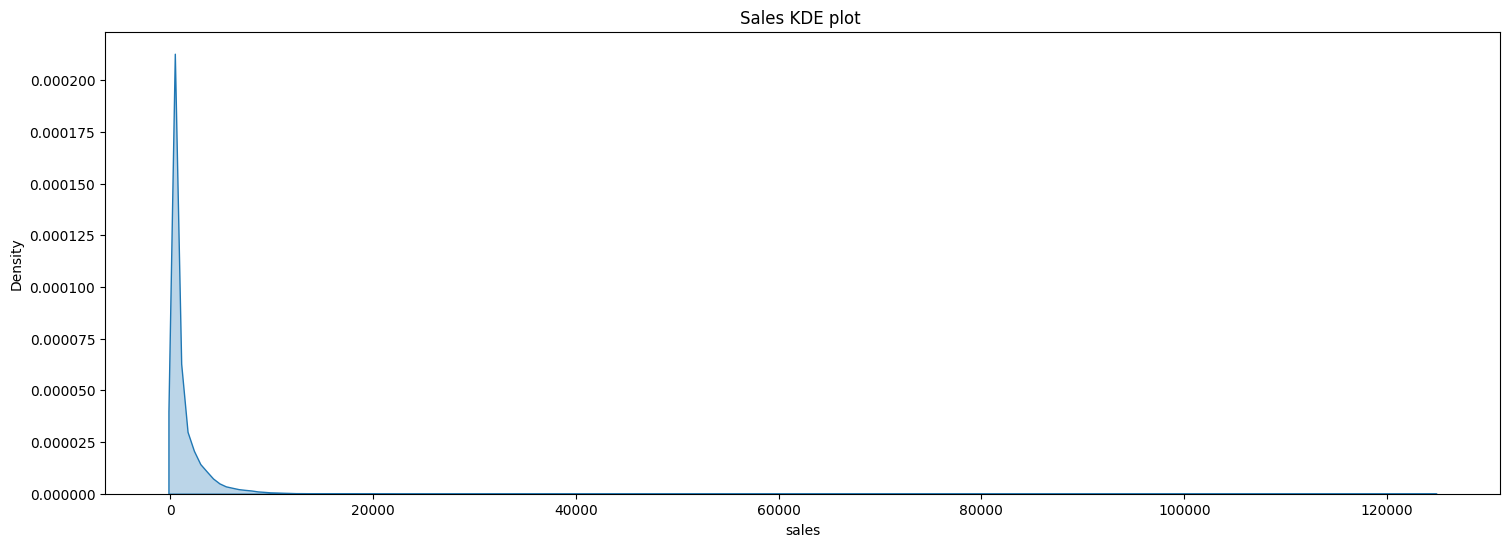

In [64]:
plt.figure(figsize=(18,6))
sns.kdeplot(train_df['sales'],alpha=0.3,fill=True)
plt.title('Sales KDE plot ')
plt.show()

- The distribution of sales is not normal

#### **BI-Variate Analysis**

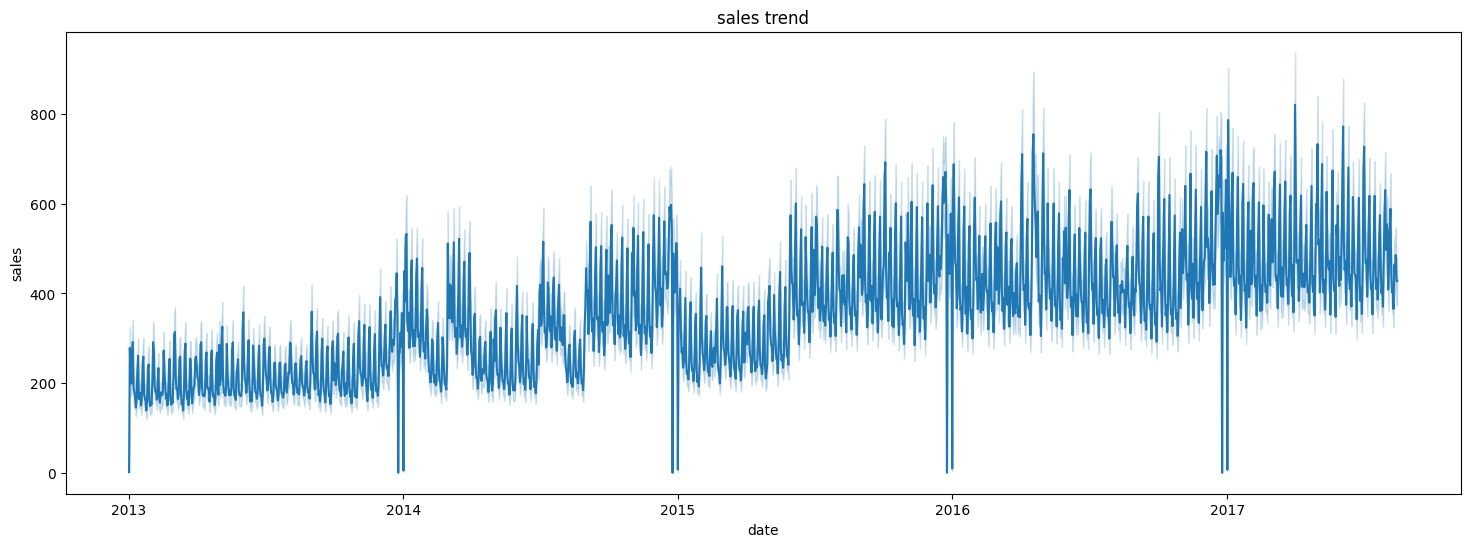

In [65]:
plt.figure(figsize=(18,6))
sns.lineplot(data=train_df,y='sales',x=train_df.index)
plt.title('sales trend')
plt.show()

- There is an upward Trend from 2013 to 2017 as the sales are rising 

In [66]:
#### correlation matrix
#selicting numerical columns
num_col = [column for column in train_df.columns if (train_df[column].dtype != 'O')]

#


In [67]:
num_col

['store_nbr', 'sales', 'onpromotion', 'year', 'month', 'week_day']

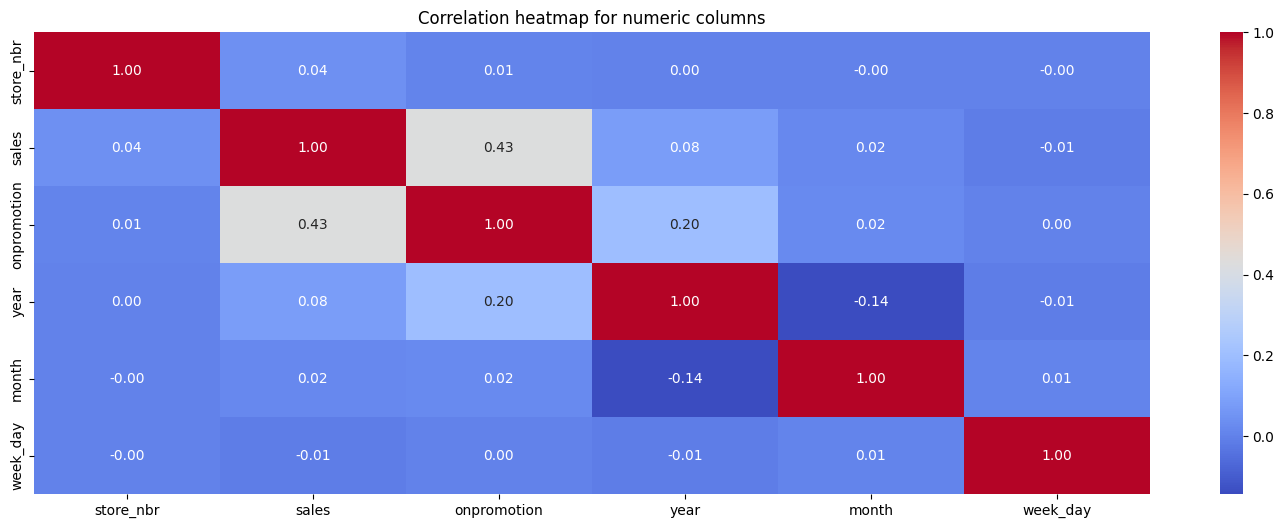

In [68]:
corr = train_df[num_col].corr()
plt.figure(figsize=(18,6))
sns.heatmap(data=corr,cmap='coolwarm',annot=True,fmt='.2f')
plt.title("Correlation heatmap for numeric columns")
plt.show()

- The sales column is more correlated with the onpromation column compared to the other columns
- Therefore, onpromotion affects the sales

## **Hypothesis Testing**
#### (H0) Null Hypothesis: There is no significant relationship between items onpromotion and sales. 
#### (H1) Alternative Hypothesis: There is  significant relationship between items onpromotion and sales.


In [69]:


# Create two groups based on 'on_promotion' column
sales_on_promotion = train_df[train_df['onpromotion'] > 0]['sales']
sales_not_on_promotion = train_df[train_df['onpromotion'] == 0]['sales']

# Perform t-test
t_statistic, p_value = ttest_ind(sales_on_promotion, sales_not_on_promotion)

# Set significance level
alpha = 0.05

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Compare p-value with significance level
if p_value < alpha:
    print("Reject null hypothesis: There is no significant relationship between items onpromotion and sales.")
else:
    print("Fail to reject null hypothesis: There is  significant relationship between items onpromotion and sales.")


T-statistic: 665.4144504427975
P-value: 0.0
Reject null hypothesis: There is no significant relationship between items onpromotion and sales.


### **Hypothesis testing outcome**
### - Outcome : There is significant relationship between items on promotion and sales

## **Answering of Business Questions**

### **Business Questions:**
1. Is the train dataset complete (has all the required dates)?
2. Which dates have the lowest and highest sales for each year (excluding days the store was closed)?
3. Compare the sales for each month across the years and determine which month of which year had the highest sales.
4. Did the earthquake impact sales?
5. Are certain stores or groups of stores selling more products? (Cluster, city, state, type)
6. Are sales affected by promotions, oil prices and holidays?
7. What analysis can we get from the date and its extractable features?
8. Which product family and stores did the promotions affect.
9. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)
10. Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.

#### **Question 1**
#### Is the train dataset complete (has all the required dates)?

In [70]:
starting_day = train_df.index.min() ### setting the first date records were being kept
ending_day = train_df.index.max() ### the last day of recording

## setting the range
train_date_range = pd.date_range(start=starting_day,end=ending_day,freq='D')  ## the date range 
#defining the dates 
existing_dates = train_df.index  ### all the dates recorded
## getting the missing dates
missing_date = train_date_range.difference(existing_dates)
print(f'There are {missing_date} missing dates') 

There are DatetimeIndex([], dtype='datetime64[ns]', freq='D') missing dates


#### **Answer**
- The dataset is complete . Has all the required dates

#### **Question Two**
#### Which dates have the lowest and highest sales for each year (excluding days the store was closed)?

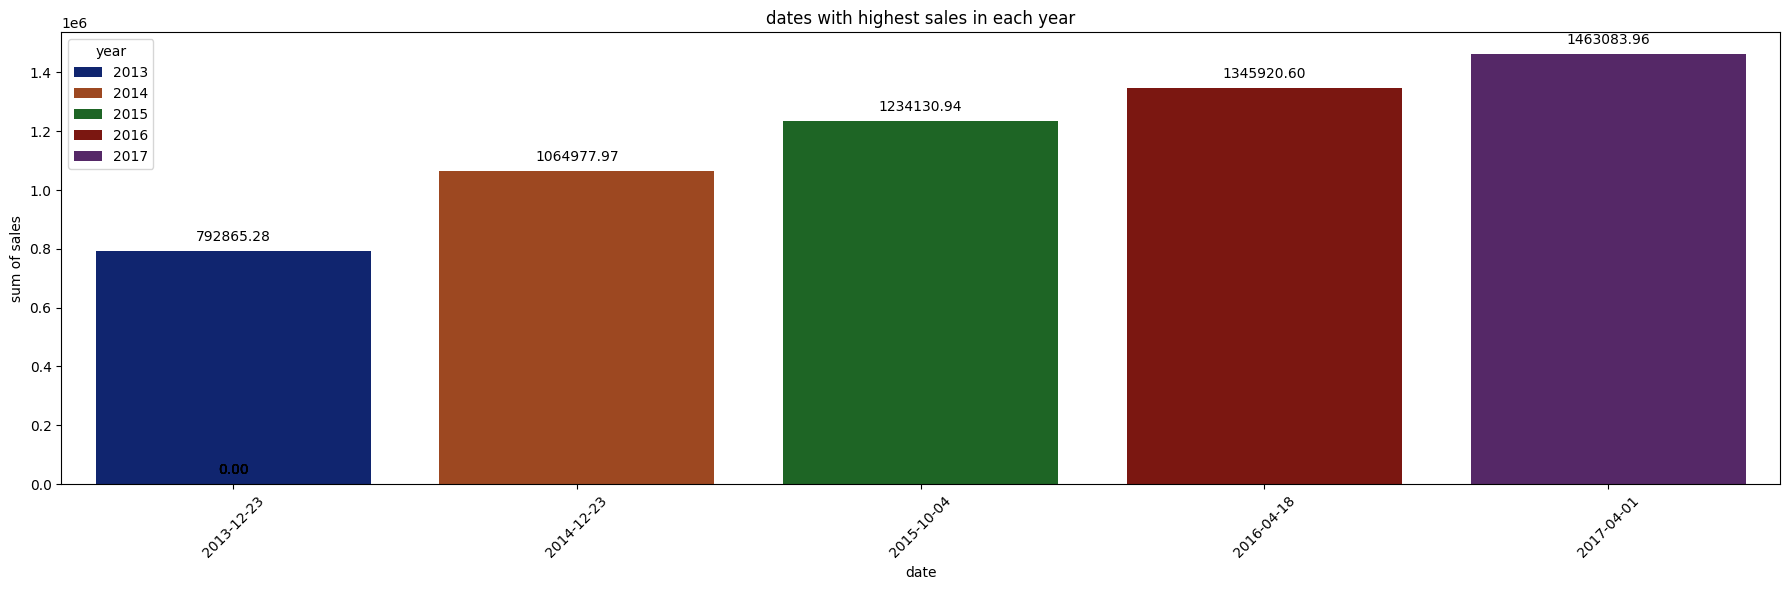

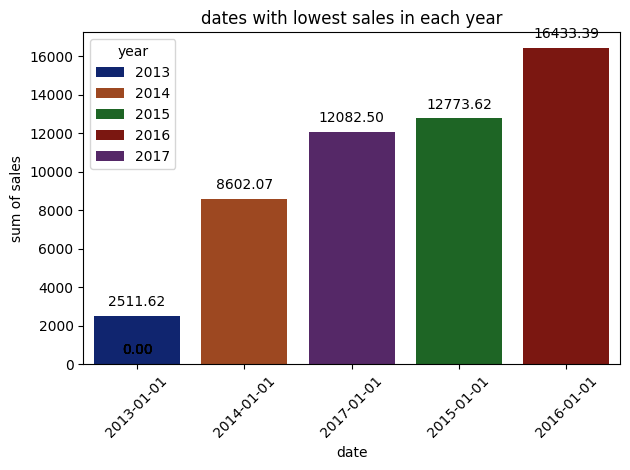

In [71]:

open_days = train_df[train_df['sales']!=0]
total_sales_by_date = open_days.groupby(open_days.index)['sales'].sum().reset_index(level=0)
total_sales_by_date['year'] = total_sales_by_date['date'].dt.year 
dist_sales = total_sales_by_date.groupby(by=[total_sales_by_date['year'],total_sales_by_date['date']])['sales'].sum().sort_values(ascending=True)
dist_sales
highest_sales = dist_sales.groupby(level=0).tail(1).reset_index(level=0)
lowest_sales = dist_sales.groupby(level=0).head(1).reset_index(level=0)
highest_sales

##plotting 
fig, axes = plt.subplots(1, 1, figsize=(18, 6))

ax1 = sns.barplot(data=highest_sales,x=highest_sales.index,y=highest_sales['sales'],hue='year',palette='dark')
plt.title('dates with highest sales in each year')
plt.xticks(rotation=45)
plt.ylabel('sum of sales')
plt.tight_layout()
for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
plt.show()

ax2 = sns.barplot(data=lowest_sales,x=lowest_sales.index,y=lowest_sales['sales'],hue='year',palette='dark')
plt.title('dates with lowest sales in each year')
plt.xticks(rotation=45)
plt.ylabel('sum of sales')
plt.tight_layout()
for p in ax2.patches:
        ax2.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
plt.show()


#### **Answer**
| Year | Date (Highest Sales) | Highest Sale | Date (Lowest Sales) | Lowest Sale |
|------|----------------------|--------------|---------------------|-------------|
| 2013 | 2013-12-23           | 792865.28         | 2013-01-01          | 2511.62     |
| 2014 | 2014-12-23           | 1064977.97         | 2014-01-01          | 8602.07     |
| 2015 | 2015-10-04           | 123413.94         | 2015-01-01          | 12773.62    |
| 2016 | 2016-04-18           | 1345920.60         | 2016-01-01          | 16433.39    |
| 2017 | 2017-04-01           | 1463083.96         | 2017-01-01          | 12082.50    |


#### **Question Three**
#### Compare the sales for each month across the years and determine which month of which year had the highest sales.

In [72]:
# Grouping by both year and month, summing up the sales
monthly_sales = train_df.groupby(['year', 'month_name']).agg({
    'sales': 'sum'})

# Reset index for easier plotting
monthly_sales.reset_index(inplace=True)
# Creating a pivot table for better visualization
pivot_sales = monthly_sales.pivot(index='month_name', columns='year', values='sales')
pivot_sales


year,2013,2014,2015,2016,2017
month_name,,,,,
April,1.099346e+07,1.286125e+07,1.495507e+07,2.596303e+07,2.589531e+07
August,1.173779e+07,1.388518e+07,2.296367e+07,2.245241e+07,1.243332e+07
December,1.580312e+07,2.434045e+07,2.724398e+07,2.964029e+07,NaN
February,9.658960e+06,1.203835e+07,1.374240e+07,2.194741e+07,2.325011e+07
January,1.032762e+07,1.891164e+07,1.489692e+07,2.397780e+07,2.632816e+07
July,1.125740e+07,1.942189e+07,2.220962e+07,2.346267e+07,2.701148e+07
June,1.168934e+07,1.331996e+07,2.161536e+07,2.220922e+07,2.568282e+07
March,1.142850e+07,2.036558e+07,1.559861e+07,2.313178e+07,2.670402e+07
May,1.159770e+07,1.337979e+07,1.773037e+07,2.477943e+07,2.691185e+07


<Figure size 1800x600 with 0 Axes>

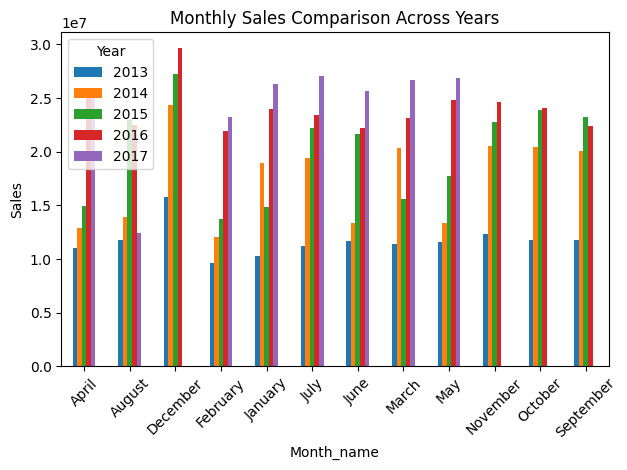

In [73]:
# Plotting
plt.figure(figsize=(18, 6))
pivot_sales.plot(kind='bar', stacked=False)
plt.title('Monthly Sales Comparison Across Years')
plt.xlabel('Month_name')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [74]:
# Finding the month with the highest sales and the corresponding year
highest_sales_month = monthly_sales.loc[monthly_sales['sales'].idxmax()]
highest_sales_value = (highest_sales_month['sales'])

# Round the sales value to 4 decimal places
highest_sales_month['sales'] = round(highest_sales_month['sales'], 0)

print("Month and year with the highest sales:")
print(highest_sales_month)
print(f"Highest sales value:{highest_sales_value:.7f}")


Month and year with the highest sales:
year                2016
month_name      December
sales         29640288.0
Name: 38, dtype: object
Highest sales value:29640287.5793851


#### **Answer**
- 2016 the month of December recorded the highest sales , that is 29,640,288

#### **Question Four**
#### Did the earthquake impact sales?

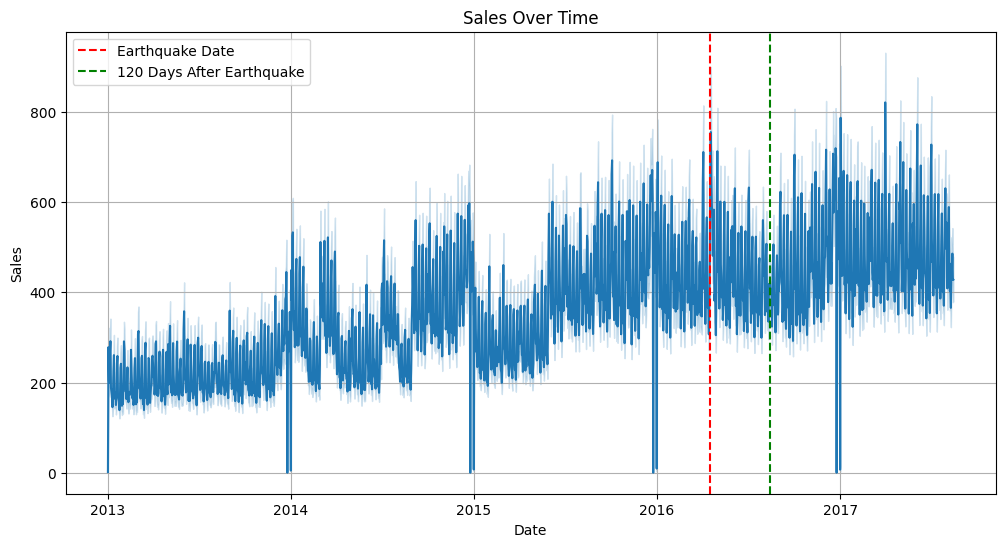

Average sales before the earthquake: 313.9008092797145
Average sales after the earthquake: 463.0379662437637
Average sales 120 days after the earthquake: 439.7110514933318


In [75]:
earthquake_date = pd.to_datetime('2016-04-16')
# Calculate the date 30 days after the earthquake
date_120_days_after_eq = earthquake_date + timedelta(days=120)

# Split the data into before and after the earthquake
sales_before_eq = train_df[train_df.index < earthquake_date]['sales']
sales_after_eq = train_df[train_df.index >= earthquake_date]['sales']
sales_120_days_after_eq = train_df[(train_df.index >= earthquake_date) & (train_df.index <= date_120_days_after_eq)]['sales']

# Calculate average sales before and after the earthquake
avg_sales_before_eq = sales_before_eq.mean()
avg_sales_after_eq = sales_after_eq.mean()
avg_sales_120_days_after_eq = sales_120_days_after_eq.mean()

 #Visualize sales data over time using seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_df, x=train_df.index, y='sales')
plt.axvline(x=earthquake_date, color='red', linestyle='--', label='Earthquake Date')
plt.axvline(x=date_120_days_after_eq, color='green', linestyle='--', label='120 Days After Earthquake')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Print average sales before and after the earthquake
print("Average sales before the earthquake:", avg_sales_before_eq)
print("Average sales after the earthquake:", avg_sales_after_eq)
print("Average sales 120 days after the earthquake:", avg_sales_120_days_after_eq)

### **Answer**
- The earthquake impacted sales. 120 days after the earthquake, the sales dropped before it began rising again. This is visible in the graph above.

#### **Question Five**
#### Are certain stores or groups of stores selling more products? (Cluster, city, state, type)

In [76]:
## merging the train_df and the stores_df using inner join on the store_nbr 
train_store = pd.merge(train_df,stores_df,on='store_nbr')
train_store.columns

Index(['store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'month_name', 'week_day', 'day_name', 'city', 'state', 'type',
       'cluster'],
      dtype='object')

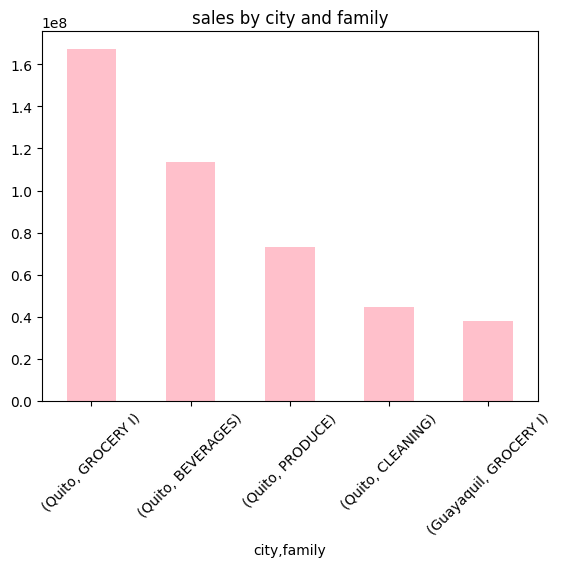

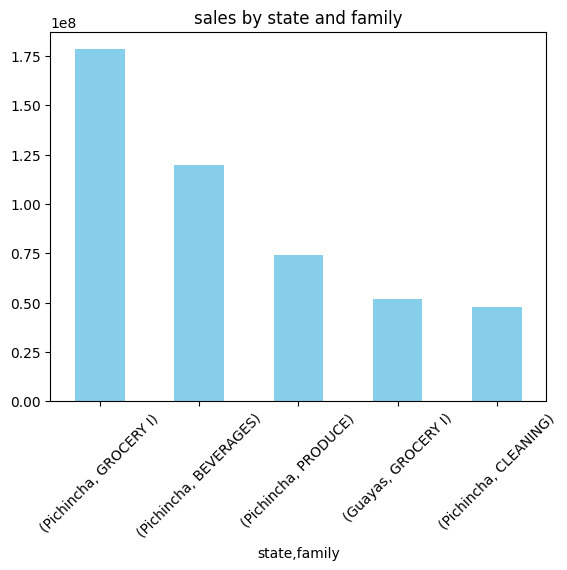

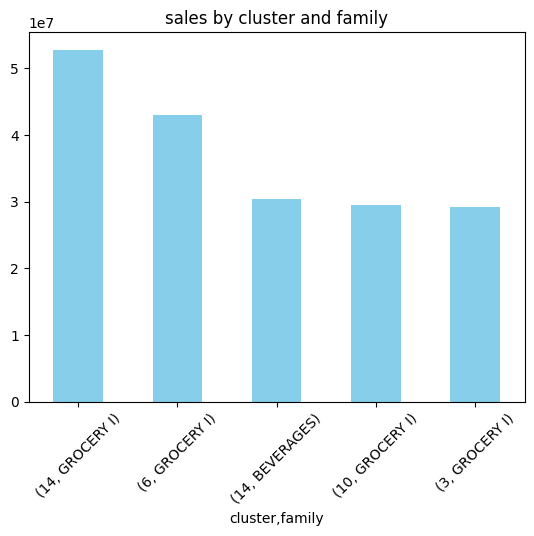

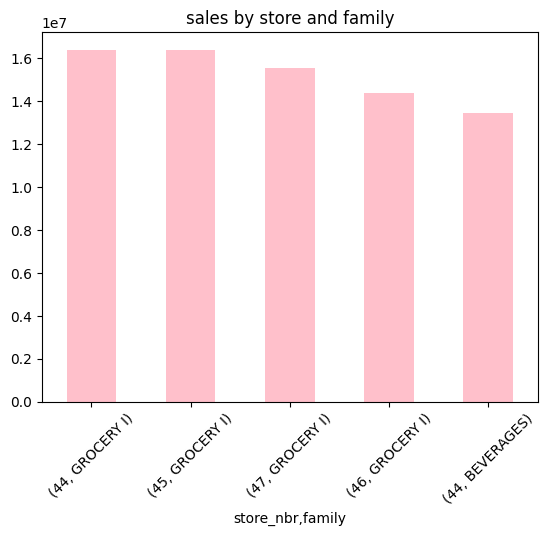

In [77]:
sales_city = train_store.groupby(by=['city','family'])['sales'].sum().sort_values(ascending=False).head(5)
sales_state = train_store.groupby(by=['state','family'])['sales'].sum().sort_values(ascending=False).head(5)
sales_cluster = train_store.groupby(by=['cluster','family'])['sales'].sum().sort_values(ascending=False).head(5)
sales_store = train_store.groupby(by=['store_nbr','family'])['sales'].sum().sort_values(ascending=False).head(5)

#plt.subplots(2,2,1)
sales_city.plot(kind='bar',color='pink')
plt.title('sales by city and family')
plt.xticks(rotation=45)
plt.show()


sales_state.plot(kind='bar',color='skyblue')
plt.title('sales by state and family')
plt.xticks(rotation=45)
plt.show()


sales_cluster.plot(kind='bar',color='skyblue')
plt.title('sales by cluster and family')
plt.xticks(rotation=45)
plt.show()

sales_store.plot(kind='bar',color='pink')
plt.title('sales by store and family')
plt.xticks(rotation=45)
plt.show()



#### **Question six**
#### Are sales affected by promotions, oil prices and holidays?

In [78]:
### merge oil_df and the holiday_df and train_df
print(oil_df.columns)
print(holiday_df.columns)
print(train_df.columns)

Index(['date', 'oil_price'], dtype='object')
Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')
Index(['store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'month_name', 'week_day', 'day_name'],
      dtype='object')


In [79]:
### merging the train_df with the oil_df and holiday_df
merged_df = pd.merge(train_df, oil_df, on='date')
merged_df = pd.merge(merged_df , holiday_df , on='date')
#merged_df

In [80]:
group_promotion = merged_df.groupby(['family']).agg({'sales': 'sum','onpromotion':'sum'}).reset_index(level=0)

#### ***sales vs oil_price***

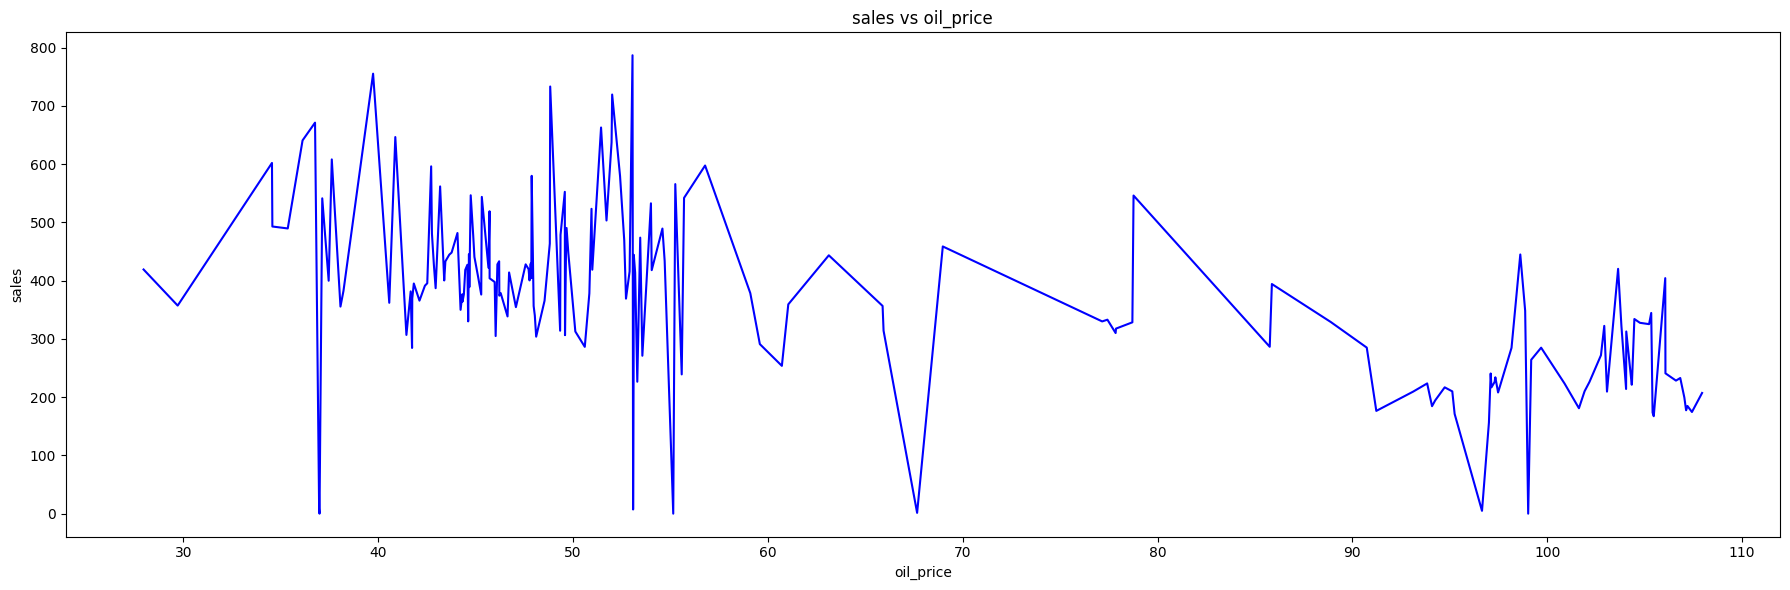

In [81]:
### sales vs oil_price
plt.figure(figsize=(18,6))
plt.title('sales vs oil_price')
sns.lineplot(data=merged_df,x='oil_price',y='sales',color='blue', linestyle='-', ci=None)
plt.tight_layout()
plt.show()


#### *findings*
- When oil_prices are low, that is when high sales are recorded
- Thus, oil_prices affects the sales inversely .The higher the oil_price the lower the sales 


#### ***sales vs promotion***

In [82]:
## getting the promoted items only
promoted = merged_df[merged_df['onpromotion']>0]

## items not promoted
not_promoted = merged_df[merged_df['onpromotion']==0]

## sales made by items promoted
promoted_sales = promoted['sales'].sum()

## sales made by items not promoted
not_promoted_sales = not_promoted['sales'].sum()


print(f'sales by promoted items {promoted_sales}')
print(f'sales by items not promoted {not_promoted_sales}')

sales by promoted items 94574205.0389307
sales by items not promoted 36316799.958995804


#### ***plotting***

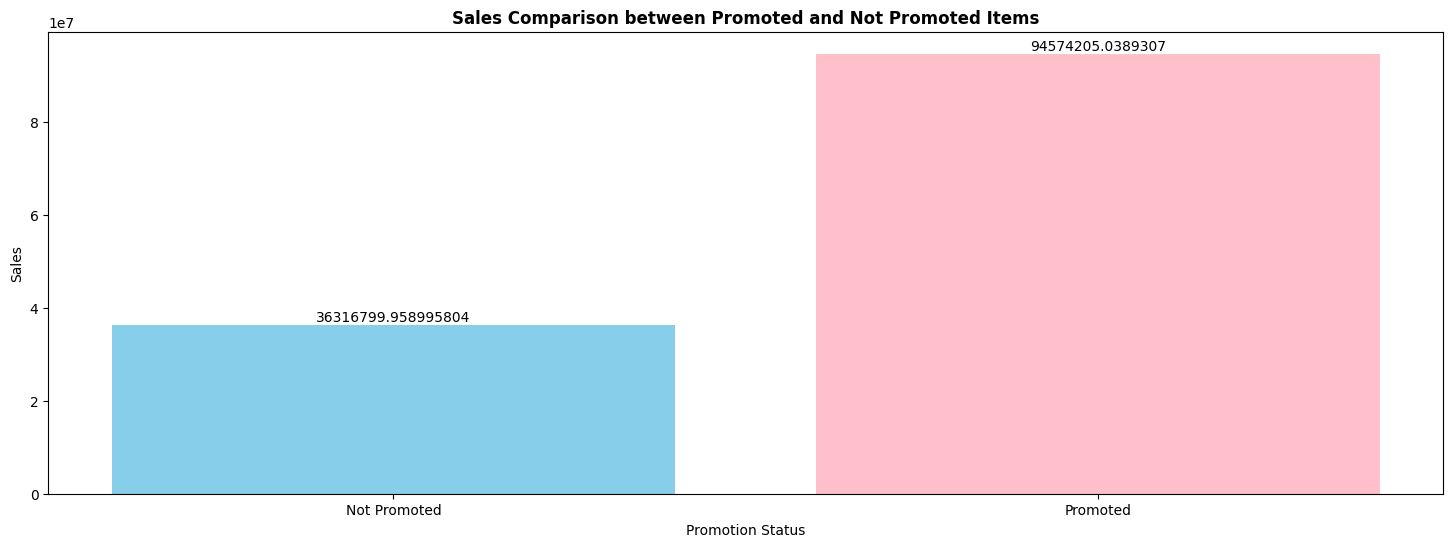

In [83]:

plt.figure(figsize=(18,6))
# Create a bar graph
plt.bar(['Not Promoted', 'Promoted'], [not_promoted_sales, promoted_sales], color=['skyblue', 'pink'])

# Add labels and title
plt.xlabel('Promotion Status')
plt.ylabel('Sales')
plt.title('Sales Comparison between Promoted and Not Promoted Items',fontweight='bold')
for i, sales in enumerate([not_promoted_sales, promoted_sales]):
    plt.text(i, sales, str(sales), ha='center', va='bottom')
    

# Show the plot
plt.show()


#### *findings*
- Items that were on promotion recorded the highest sales compared to items that were not promoted
- Therefore, promotion affects the sales as people tend to purchase more on items being promoted

#### ***Sales vs holidays***

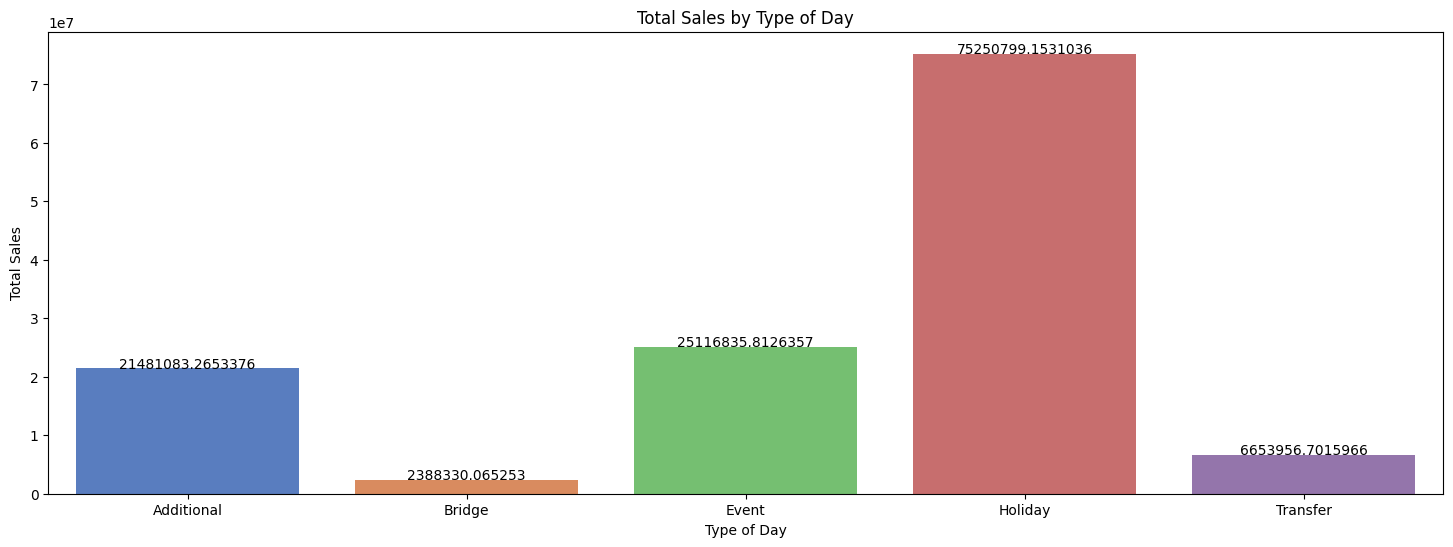

In [84]:

# Grouping sales by the type of day
holiday_sales = merged_df.groupby('type')['sales'].sum().reset_index()

# Creating a bar plot
plt.figure(figsize=(18, 6))
sns.barplot(data=holiday_sales, x='type', y='sales', palette='muted')
for index, row in holiday_sales.iterrows():
    plt.text(index, row['sales'], str(row['sales']), color='black', ha='center')
plt.xlabel('Type of Day')
plt.ylabel('Total Sales')
plt.title('Total Sales by Type of Day')
plt.show()


#### *findings*
- days that were holidays recorded the highest sales compared to the other days
- people tend to do alot of purchase during holidays

#### **Question seven**
#### What analysis can we get from the date and its extractable features?

In [85]:
train_df.columns

Index(['store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'month_name', 'week_day', 'day_name'],
      dtype='object')

In [86]:
## getting first date of recording and the last
 
begining_day = train_df.index.min()
last_day = train_df.index.max()
print(f'begining date: {begining_day}')
print(f'ending date: {last_day}')

begining date: 2013-01-01 00:00:00
ending date: 2017-08-15 00:00:00


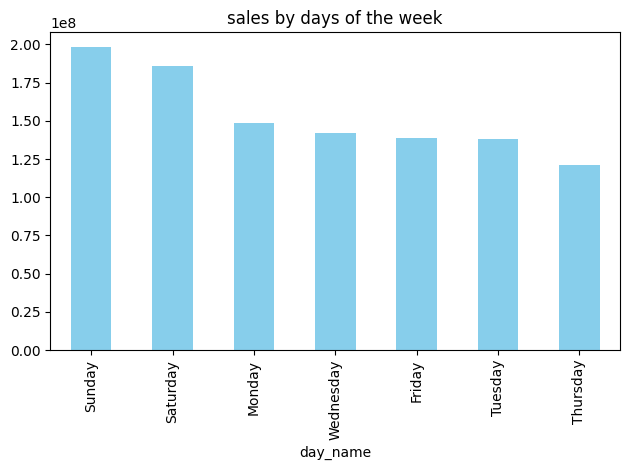

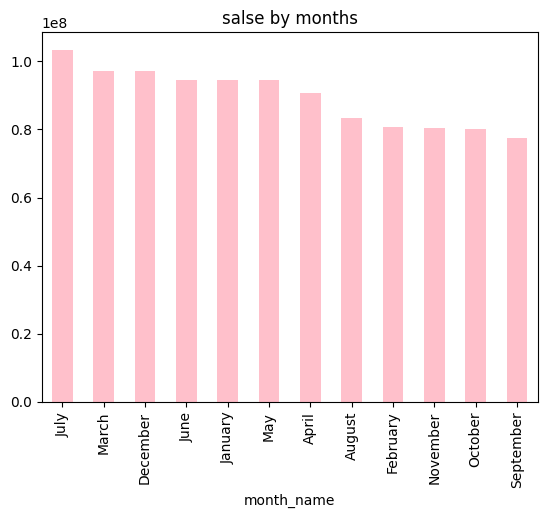

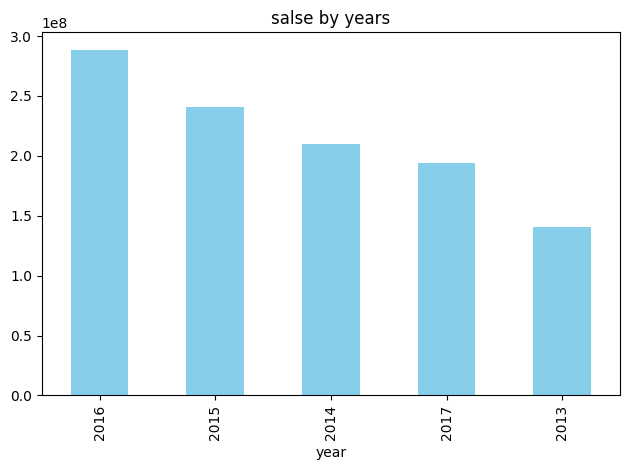

In [87]:
### grouping the sales by the days of the week
sales_by_day = train_df.groupby('day_name')['sales'].sum().sort_values(ascending=False)

### grouping sales by months
sales_by_months = train_df.groupby('month_name')['sales'].sum().sort_values(ascending=False)

## grouping sales by years
sales_by_years = train_df.groupby('year')['sales'].sum().sort_values(ascending=False)

### plot the grouping
sales_by_day.plot(kind='bar',color='skyblue')
plt.title('sales by days of the week')
plt.tight_layout()
plt.show()

### plotting sales vs months
sales_by_months.plot(kind='bar',color="pink")
plt.title('salse by months')
#plt.tight_layout()
plt.show()

### plotting sales vs years
sales_by_years.plot(kind='bar',color='skyblue')
plt.title('salse by years')
plt.tight_layout()
plt.show()




#### ***Answer***
- Sales were recorded from 2013-01-01 to 2017-08-15 
- missing dates were '2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'

- Weekends recorded the highest sales compared to other days of the week 
- 2016 recorded the most sales
- July had the highest sales compared to other months 

#### **Question eight**
#### Which product family and stores did the promotions affect.

In [88]:
merged_df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'month_name', 'week_day', 'day_name', 'oil_price', 'type', 'locale',
       'locale_name', 'description', 'transferred'],
      dtype='object')

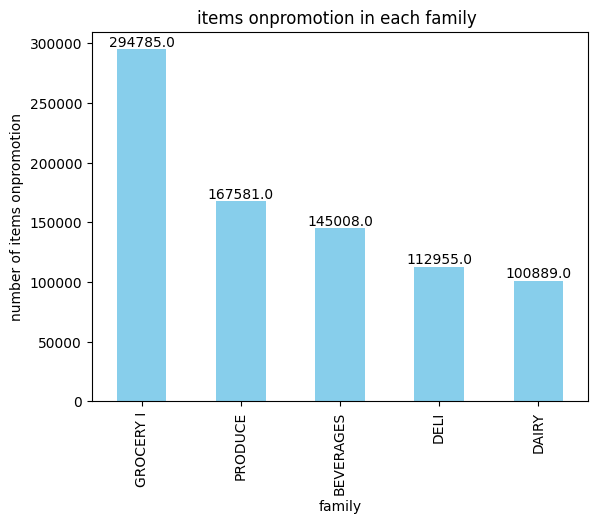

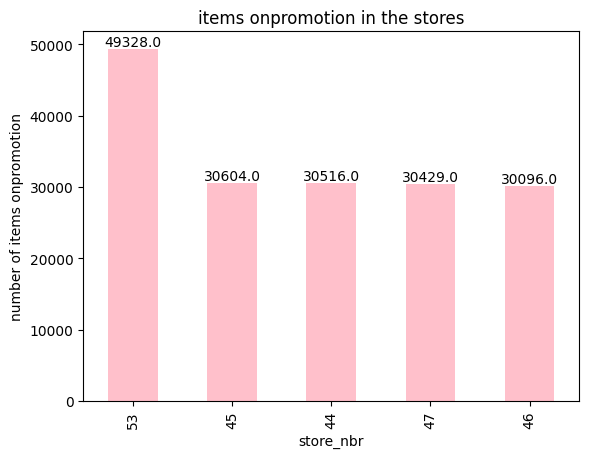

In [89]:
## grouping number of items on promotion by family
promotion_family = merged_df.groupby('family')['onpromotion'].sum().sort_values(ascending=False).head(5)

## grouping number of items on promotion by store
promotion_store = merged_df.groupby('store_nbr')['onpromotion'].sum().sort_values(ascending=False).head(5)

## plotting
promotion_family.plot(kind='bar',color='skyblue')
plt.title('items onpromotion in each family ')
plt.ylabel('number of items onpromotion')
# Annotating the bars with their values
for i, value in enumerate(promotion_family):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')
plt.show()

promotion_store.plot(kind='bar',color='pink')
plt.title('items onpromotion in the stores')
plt.ylabel('number of items onpromotion')
# Annotating the bars with their values
for i, value in enumerate(promotion_store):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')
plt.show()

#### **Answer**
- store number 53 and family product GroceryI were the most affected by promotions


#### **Question ten**
#### Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.

In [90]:
train_df.columns

Index(['store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'month_name', 'week_day', 'day_name'],
      dtype='object')

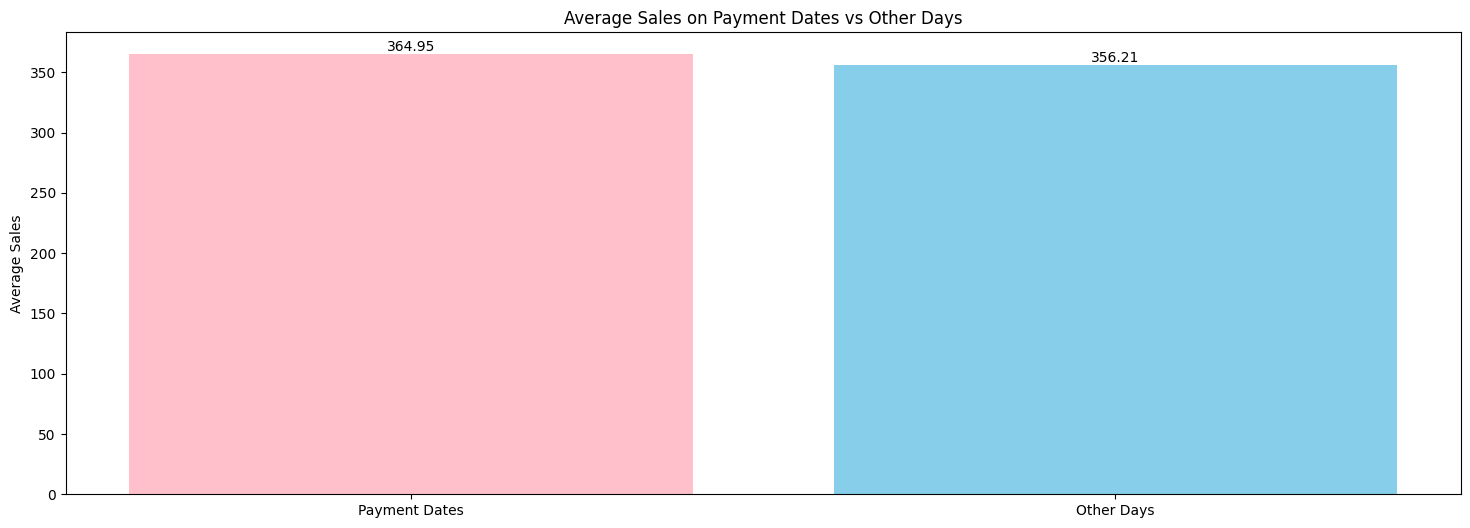

In [91]:

#  Filter payment dates (15th, 30th, and 31st)
payment_dates = train_df[(train_df.index.day == 15) | (train_df.index.day == 30) | (train_df.index.day == 31)]

# Group sales by payment dates and other days
payment_sales = payment_dates['sales']
other_sales = train_df[~train_df.index.isin(payment_dates.index)]['sales']

# Calculate average sales for each group
average_payment_sales = payment_sales.mean()
average_other_sales = other_sales.mean()

# Plotting
plt.figure(figsize=(18, 6))
bars = plt.bar(['Payment Dates', 'Other Days'], [average_payment_sales, average_other_sales], color=['pink', 'skyblue'])
plt.title('Average Sales on Payment Dates vs Other Days')
plt.ylabel('Average Sales')
# Annotate the bars with their values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.show()


#### **Answer**
- The average sales on paymentdays is 364.95
- The average sales on the other days is 356.21
- Payment therefore affects sales . More sales is done during the payment days 

## **Hypothesis Testing**
#### (H0) Null Hypothesis: There is no significant relationship between items onpromotion and sales. 
#### (H1) Alternative Hypothesis: There is  significant relationship between items onpromotion and sales.

In [92]:


# Create two groups based on 'on_promotion' column
sales_on_promotion = train_df[train_df['onpromotion'] > 0]['sales']
sales_not_on_promotion = train_df[train_df['onpromotion'] == 0]['sales']

# Perform t-test
t_statistic, p_value = ttest_ind(sales_on_promotion, sales_not_on_promotion)

# Set significance level
alpha = 0.05

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Compare p-value with significance level
if p_value < alpha:
    print("Reject null hypothesis: There is no significant relationship between items onpromotion and sales.")
else:
    print("Fail to reject null hypothesis: There is  significant relationship between items onpromotion and sales.")


T-statistic: 665.4144504427975
P-value: 0.0
Reject null hypothesis: There is no significant relationship between items onpromotion and sales.


### **Hypothesis testing outcome**
### - Outcome : There is significant relationship between items on promotion and sales

## ***Data preparation***

#### Holiday data


In [93]:
holiday_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


-  A holiday that is transferred officially falls on that calendar day but was moved to another date by the government.
-  A transferred day is more like a normal day than a holiday. 
-  To find the day that it was celebrated, look for the corresponding row where type is Transfer.

In [94]:
### getting the holidays that were transferred
holiday_df[holiday_df['transferred']==True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [95]:
### getting the days which transferred holidays were actually celebrated
holiday_df[holiday_df['type']=='Transfer']

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


In [96]:
## drop the holidays that were transferred since are not the actual holidays when celebrations occurred
holiday_df = holiday_df[holiday_df['transferred']!=True]
holiday_df.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [97]:
## replacing transfer in the type column with holiday  since these are the days when the holiday was celebrated
holiday_df['type'] = holiday_df['type'].replace(to_replace='Transfer',value='Holiday')

In [98]:
### droping the transfered column and the description column as are no longer needed in our analysis
holiday_df = holiday_df.drop(columns=['transferred','description'])

In [99]:
### check for missing dates in the holiday data
holiday_df.reset_index() ## reseting the index
## getting the begining and end 
start_holiday = holiday_df.date.min()
end_holiday = holiday_df.date.max()
print (f"holiday started on:{start_holiday} ,holiday ended on: {end_holiday}")
## geting the range
range_holiday = pd.date_range(start=start_holiday,end=end_holiday)

## getting missing dates
missing_dates = date_range.difference(holiday_df['date'])
print("missing dates :" , len(missing_dates))


holiday started on:2012-03-02 00:00:00 ,holiday ended on: 2017-12-26 00:00:00
missing dates : 1826


In [100]:
## add missing dates 
missing_df = list(missing_dates)
new_dates = pd.DataFrame(missing_df,columns=['date'])
new_dates.dtypes

date    datetime64[ns]
dtype: object

In [101]:
### concatenate the missing dates data with the original holiday data
holiday_concat = pd.concat([holiday_df,new_dates],ignore_index=True)
holiday_concat.sort_values(by='date',inplace=True)
holiday_concat.reset_index(drop=True,inplace=True)

In [102]:
## check for nulls
print(holiday_concat.head())
holiday_concat.isnull().sum()

        date     type locale locale_name
0 2012-03-02  Holiday  Local       Manta
1 2012-03-03      NaN    NaN         NaN
2 2012-03-04      NaN    NaN         NaN
3 2012-03-05      NaN    NaN         NaN
4 2012-03-06      NaN    NaN         NaN


date              0
type           1826
locale         1826
locale_name    1826
dtype: int64

In [103]:
### replacing the nulls with a string 'N/A' which will be rectified later 
holiday_df = holiday_concat.fillna('N/A')
holiday_df.head()

,date,type,locale,locale_name
0,2012-03-02,Holiday,Local,Manta
1,2012-03-03,N/A,N/A,N/A
2,2012-03-04,N/A,N/A,N/A
3,2012-03-05,N/A,N/A,N/A
4,2012-03-06,N/A,N/A,N/A


#### Oil_data

In [104]:
##check for missing dates
oil_df.reset_index() ## reseting the index
## getting the begining and end 
start_oil = oil_df.date.min()
end_oil = oil_df.date.max()
print (f"oil data started on:{start_oil} ,oil data ended on: {end_oil}")
## geting the range
range_oil = pd.date_range(start=start_oil,end=end_oil)

## getting missing dates
oil_missing_dates = date_range.difference(oil_df['date'])
print("oil_missing dates :" , len(oil_missing_dates))

oil data started on:2013-01-01 00:00:00 ,oil data ended on: 2017-08-31 00:00:00
oil_missing dates : 908


#### Merging oil data and Train data

In [105]:
## getting the range of train data
train_df.reset_index(inplace=True) ## reseting the index
## getting the begining and end 
start_train = train_df.date.min()
end_train = train_df.date.max()
print (f"train data started on:{start_train} ,train data ended on: {end_train}")

train data started on:2013-01-01 00:00:00 ,train data ended on: 2017-08-15 00:00:00


In [106]:
train_df['date'] = pd.to_datetime(train_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])

In [107]:
## merging the oil data and train data by keeping all the train data
train_df1 = pd.merge(train_df,oil_df,on='date',how='left')
train_df1.sort_values(by='date',ascending=True)

,date,store_nbr,family,sales,onpromotion,year,month,month_name,week_day,day_name,oil_price
0,2013-01-01,1,AUTOMOTIVE,0.000,0.0,2013,1,January,1,Tuesday,67.661824
1194,2013-01-01,42,CELEBRATION,0.000,0.0,2013,1,January,1,Tuesday,67.661824
1193,2013-01-01,42,BREAD/BAKERY,0.000,0.0,2013,1,January,1,Tuesday,67.661824
1192,2013-01-01,42,BOOKS,0.000,0.0,2013,1,January,1,Tuesday,67.661824
1191,2013-01-01,42,BEVERAGES,0.000,0.0,2013,1,January,1,Tuesday,67.661824
...,...,...,...,...,...,...,...,...,...,...,...
2999695,2017-08-15,25,POULTRY,172.517,0.0,2017,8,August,15,Tuesday,47.570000
2999694,2017-08-15,25,PLAYERS AND ELECTRONICS,3.000,0.0,2017,8,August,15,Tuesday,47.570000
2999693,2017-08-15,25,PET SUPPLIES,3.000,0.0,2017,8,August,15,Tuesday,47.570000
2999704,2017-08-15,26,BOOKS,0.000,0.0,2017,8,August,15,Tuesday,47.570000


#### merging with stores_df

In [108]:
stores_df.reset_index()
train_df2 = pd.merge(train_df1,stores_df,on='store_nbr',how='left')
train_df2.sort_values(by='date',ascending=True)

,date,store_nbr,family,sales,onpromotion,year,month,month_name,week_day,day_name,oil_price,city,state,type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.000,0.0,2013,1,January,1,Tuesday,67.661824,Quito,Pichincha,D,13
1194,2013-01-01,42,CELEBRATION,0.000,0.0,2013,1,January,1,Tuesday,67.661824,Cuenca,Azuay,D,2
1193,2013-01-01,42,BREAD/BAKERY,0.000,0.0,2013,1,January,1,Tuesday,67.661824,Cuenca,Azuay,D,2
1192,2013-01-01,42,BOOKS,0.000,0.0,2013,1,January,1,Tuesday,67.661824,Cuenca,Azuay,D,2
1191,2013-01-01,42,BEVERAGES,0.000,0.0,2013,1,January,1,Tuesday,67.661824,Cuenca,Azuay,D,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999695,2017-08-15,25,POULTRY,172.517,0.0,2017,8,August,15,Tuesday,47.570000,Salinas,Santa Elena,D,1
2999694,2017-08-15,25,PLAYERS AND ELECTRONICS,3.000,0.0,2017,8,August,15,Tuesday,47.570000,Salinas,Santa Elena,D,1
2999693,2017-08-15,25,PET SUPPLIES,3.000,0.0,2017,8,August,15,Tuesday,47.570000,Salinas,Santa Elena,D,1
2999704,2017-08-15,26,BOOKS,0.000,0.0,2017,8,August,15,Tuesday,47.570000,Guayaquil,Guayas,D,10


#### Merge with holiday data 

In [109]:
training_df = pd.merge(train_df2,holiday_df,on='date',how='left')
training_df.sort_values(by='date',ascending=True)

,date,store_nbr,family,sales,onpromotion,year,month,month_name,week_day,day_name,oil_price,city,state,type_x,cluster,type_y,locale,locale_name
0,2013-01-01,1,AUTOMOTIVE,0.000,0.0,2013,1,January,1,Tuesday,67.661824,Quito,Pichincha,D,13,Holiday,National,Ecuador
1194,2013-01-01,42,CELEBRATION,0.000,0.0,2013,1,January,1,Tuesday,67.661824,Cuenca,Azuay,D,2,Holiday,National,Ecuador
1193,2013-01-01,42,BREAD/BAKERY,0.000,0.0,2013,1,January,1,Tuesday,67.661824,Cuenca,Azuay,D,2,Holiday,National,Ecuador
1192,2013-01-01,42,BOOKS,0.000,0.0,2013,1,January,1,Tuesday,67.661824,Cuenca,Azuay,D,2,Holiday,National,Ecuador
1191,2013-01-01,42,BEVERAGES,0.000,0.0,2013,1,January,1,Tuesday,67.661824,Cuenca,Azuay,D,2,Holiday,National,Ecuador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053155,2017-08-15,25,POULTRY,172.517,0.0,2017,8,August,15,Tuesday,47.570000,Salinas,Santa Elena,D,1,Holiday,Local,Riobamba
3053154,2017-08-15,25,PLAYERS AND ELECTRONICS,3.000,0.0,2017,8,August,15,Tuesday,47.570000,Salinas,Santa Elena,D,1,Holiday,Local,Riobamba
3053153,2017-08-15,25,PET SUPPLIES,3.000,0.0,2017,8,August,15,Tuesday,47.570000,Salinas,Santa Elena,D,1,Holiday,Local,Riobamba
3053164,2017-08-15,26,BOOKS,0.000,0.0,2017,8,August,15,Tuesday,47.570000,Guayaquil,Guayas,D,10,Holiday,Local,Riobamba


In [110]:
### drop columns we don't need for analysis 
columns_to_drop = ['city', 'state', 'locale_name', 'locale']
train_df = training_df.drop(columns=columns_to_drop)


In [111]:
### renaming columns
train_df.rename(columns={'type_y':'is_holiday','type_x':'store_type'},inplace=True)

In [112]:
train_df.head()

,date,store_nbr,family,sales,onpromotion,year,month,month_name,week_day,day_name,oil_price,store_type,cluster,is_holiday
0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,2013,1,January,1,Tuesday,67.661824,D,13,Holiday
1,2013-01-01,1,BABY CARE,0.0,0.0,2013,1,January,1,Tuesday,67.661824,D,13,Holiday
2,2013-01-01,1,BEAUTY,0.0,0.0,2013,1,January,1,Tuesday,67.661824,D,13,Holiday
3,2013-01-01,1,BEVERAGES,0.0,0.0,2013,1,January,1,Tuesday,67.661824,D,13,Holiday
4,2013-01-01,1,BOOKS,0.0,0.0,2013,1,January,1,Tuesday,67.661824,D,13,Holiday


In [113]:
train_df['is_holiday'].unique()

array(['Holiday', 'N/A', 'Work Day', 'Additional', 'Event', 'Bridge'],
      dtype=object)

In [114]:
### making the is_holiday column to be binary i.e holiday or no_holiday
train_df['is_holiday'].replace(to_replace={'Holiday','Bridge','Event','Additional'},value='Holiday',inplace=True)
train_df['is_holiday'].replace(to_replace={'N/A','Work Day'},value='No_Holiday',inplace=True)
train_df['is_holiday'].unique()

array(['Holiday', 'No_Holiday'], dtype=object)

In [115]:
### replacing Holiday with 1 and no holiday with 0
train_df['is_holiday']=train_df['is_holiday'].replace('Holiday',1).replace('No_Holiday',0)

In [116]:
### reducing the families by grouping those similar to reduce multicolinearity
train_df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [277]:
def regroup_family(train):
    train_df['family'].replace(to_replace={'AUTOMOTIVE','PLAYERS AND ELECTRONICS','HOME APPLIANCES','HARDWARE','LAWN AND GARDEN', 'HOME AND KITCHEN I', 'HOME AND KITCHEN II'},value='appliences',inplace=True)
    train_df['family'].replace(to_replace={'SCHOOL AND OFFICE SUPPLIES','MAGAZINES', 'BOOKS'},value='School_appliances',inplace=True)
    train_df['family'].replace(to_replace={'BEVERAGES','LIQUOR,WINE,BEER'},value='drinks',inplace=True)
    train_df['family'].replace(to_replace={'BABY CARE', 'BEAUTY','CLEANING','HOME CARE', 'LADIESWEAR','PERSONAL CARE','LINGERIE'},value='Hygiene',inplace=True)
    train_df['family'].replace(to_replace={'BREAD/BAKERY','GROCERY I', 'GROCERY II','PREPARED FOODS','PRODUCE','PET SUPPLIES'},value='plant_produce',inplace=True)
    train_df['family'].replace(to_replace={'DAIRY', 'DELI', 'EGGS','FROZEN FOODS','MEATS','POULTRY','SEAFOOD'},value='animal_produce',inplace=True)
regroup_family(train_df)

In [118]:
train_df['family'].unique()

array(['appliences', 'Hygiene', 'drinks', 'School_appliances',
       'plant_produce', 'CELEBRATION', 'animal_produce'], dtype=object)

In [119]:

# Save the DataFrame back to a CSV file
train_df.to_csv(r'C:\Users\USER\Desktop\LP3_Time_Series\datasets\time_series_data.csv', index=False)

### ***Decomposition***

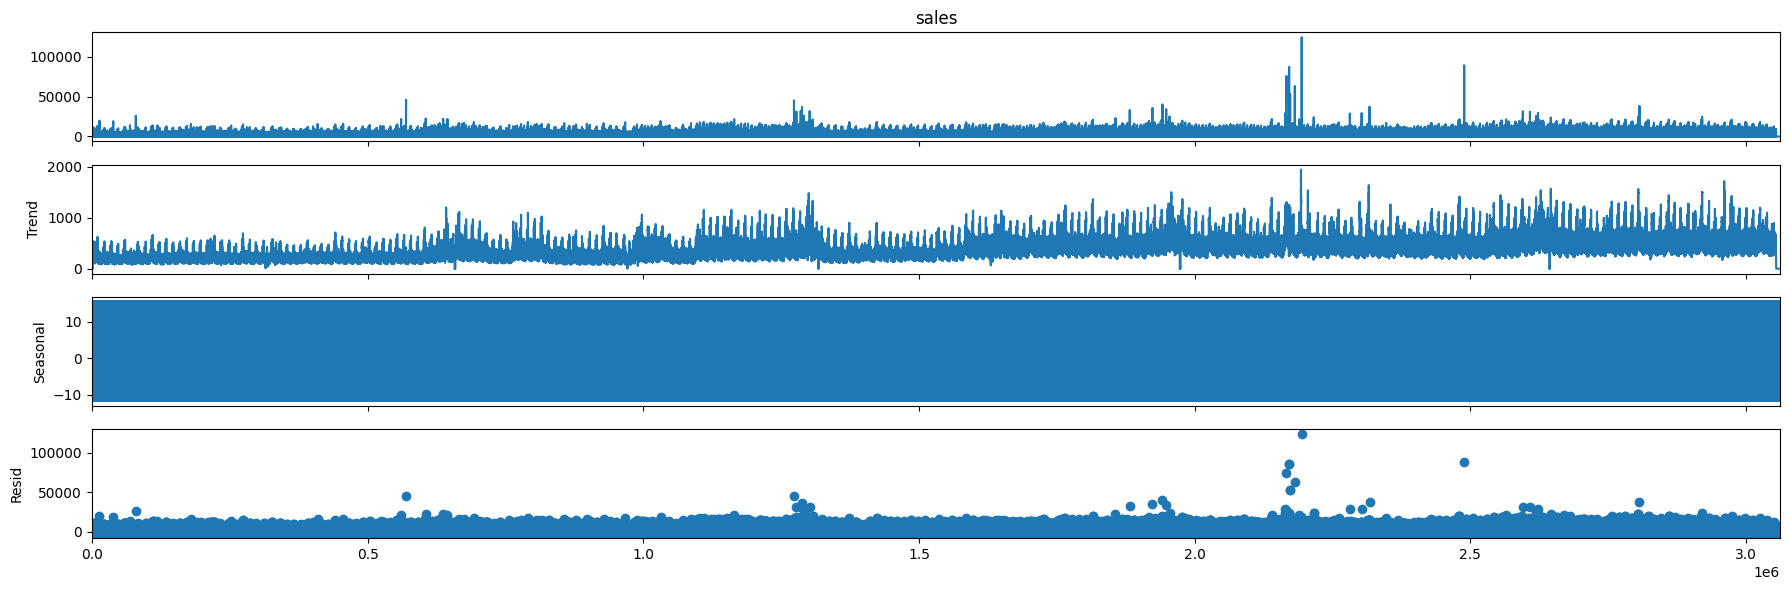

In [120]:
add_result = seasonal_decompose(train_df['sales'],model='additive',period=365)
plt.rcParams.update({'figure.figsize':(18,6)})
add_result.plot()
plt.show()

- There is not seasonality , however we have to proof this by checking for stationarity
- presence of upward trend
- There is noise in our data

#### **Checking for** *stationarity*

In [121]:
## downsampling the sales to daily
train_df.set_index('date', inplace=True)
downsampled_sales = train_df['sales'].resample('D').mean().dropna()

In [122]:
result = adfuller(downsampled_sales)
print(f"test statistic:{result[0]}")
print(f'p_value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print('series not stationary')
else:
    print('series stationary')

test statistic:-2.5714136301716985
p_value: 0.09905058352484253
critical_values: {'1%': -3.434283579780684, '5%': -2.863277451883613, '10%': -2.5676949772294817}
series not stationary


##### **Visualizing stationary**

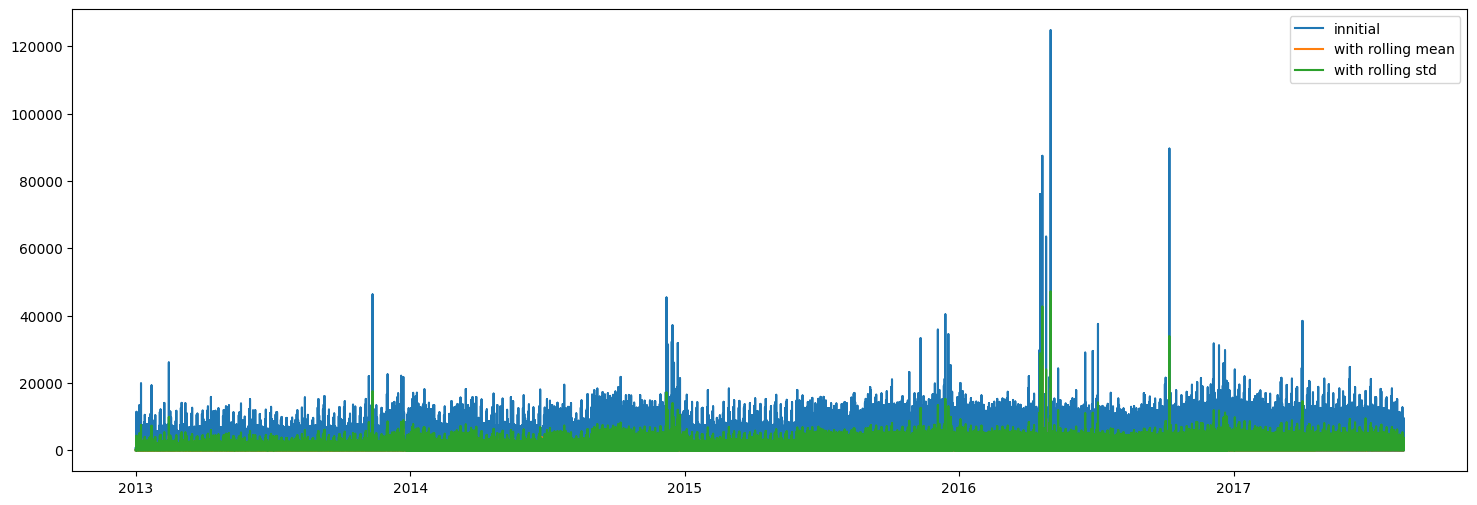

In [123]:
rolling_mean = train_df['sales'].rolling(window=7).mean()
rolling_std = train_df['sales'].rolling(window=7).std()
plt.plot(train_df['sales'],label = 'innitial')
plt.plot(rolling_mean,label='with rolling mean')
plt.plot(rolling_std,label='with rolling std')
plt.legend(loc='best')

#### **removing trend using differencing method**

In [156]:
## group your data to daily data
train_df= train_df.groupby(["family", pd.Grouper(freq="D")]).agg({"sales":"sum", 
                                                                     "onpromotion":"sum",
                                                                    }).reset_index()
train_df

,family,date,sales,onpromotion
0,CELEBRATION,2013-01-01,0.000000,0.0
1,CELEBRATION,2013-01-02,0.000000,0.0
2,CELEBRATION,2013-01-03,0.000000,0.0
3,CELEBRATION,2013-01-04,0.000000,0.0
4,CELEBRATION,2013-01-05,0.000000,0.0
...,...,...,...,...
11811,plant_produce,2017-08-11,392604.045021,3183.0
11812,plant_produce,2017-08-12,384455.997892,3141.0
11813,plant_produce,2017-08-13,424615.520418,4472.0
11814,plant_produce,2017-08-14,375051.121982,3158.0


In [164]:
## Dataset for statistical models
## Convert the data into a daily summations
train= train_df["sales"].resample("D").sum().rename("Total_sales").reset_index()

train

,date,Total_sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229
...,...,...
1683,2017-08-11,826373.722022
1684,2017-08-12,792630.535079
1685,2017-08-13,865639.677471
1686,2017-08-14,760922.406081


In [165]:
def make_stationary(data):
    return data.diff().dropna()

# Making the time series stationary
train["sale_diff"] = make_stationary(train["Total_sales"])

In [168]:
train = train.set_index('date')

In [169]:

## Downsample the data to weekly averages
wkly_sales = train["sale_diff"].resample('W').mean() # resample weekly and calculate mean
print(wkly_sales)

## Check if the data is stationary
t_stat, p_value, critical_values, _, _ = zivot_andrews(wkly_sales.values)
print(f'Zivot-Andrews Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')

print(f'\np-value: {p_value:.2f}')
print("Non-Stationary") if p_value > 0.05 else print("Stationary")

date
2013-01-06    103436.756418
2013-01-13     -7865.264727
2013-01-20      -506.594564
2013-01-27     -4382.913545
2013-02-03      7989.261278
                  ...      
2017-07-23    -10930.708254
2017-07-30     14209.105244
2017-08-06    -10599.044811
2017-08-13    -26274.212401
2017-08-20    -51488.870766
Freq: W-SUN, Name: sale_diff, Length: 242, dtype: float64
Zivot-Andrews Statistic: -7.70
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary


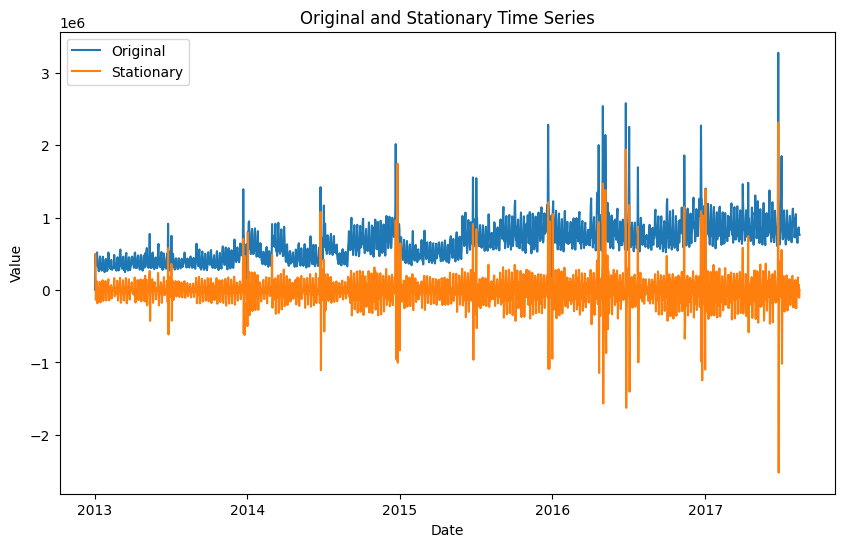

In [170]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Total_sales'], label='Original')
plt.plot(train.index, train["sale_diff"], label='Stationary')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original and Stationary Time Series')
plt.legend()
plt.show()

#### ***Data splitting***

### for statistical models

In [171]:
## Drop missing values
train= train.dropna()

In [172]:
## DATA SPLITING
split_date= "2017-06-01"

train_set= train.loc[train.index < split_date]
test_set= train.loc[train.index >= split_date]

print("Training set shape:", train_set.shape)
print("Testing set shape:", test_set.shape)

Training set shape: (1611, 2)
Testing set shape: (76, 2)


In [173]:
### for statistical models
# Split the data into training and testing sets
train_size = int(0.9 * len(train_df)) 
trained_set= train_df.iloc[:train_size]
tested_set= train_df.iloc[train_size:]

## split the data
X_train= trained_set.drop(columns=["sales"])
y_train= trained_set["sales"]
X_test= tested_set.drop(columns=["sales"])
y_test= tested_set["sales"]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10634, 2)
y_train shape: (10634,)
X_test shape: (1182, 2)
y_test shape: (1182,)


### **Encoding and scaling**

In [174]:
#Get numerical columns
numerical_columns = X_train.select_dtypes('number').columns
categorical_columns = X_train.select_dtypes('object').columns

In [175]:
# prepare numerical pipeline
numerical_pipeline=Pipeline(steps=[
('numerical_imputer',SimpleImputer(strategy='median')),
('scaler', StandardScaler())
    
])

# prepare categorical pipeline
categorical_pipeline=Pipeline(steps=[
    ('categorical_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])
    

# Column transformer preparation
preprocessor=ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline,numerical_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_columns)
])


In [134]:
## create the pipeline
pipeline = Pipeline(steps=[('preprocessor',preprocessor)])


### **MODELLING WITH STATISTICAL MODELS**

#### **AUTOREG MODEL**

In [176]:
model = AutoReg(train_set["sale_diff"], lags=7)
model_fit = model.fit()
model= model_fit.summary()
warnings.filterwarnings("default")
model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              sale_diff   No. Observations:                 1611
Model:                     AutoReg(7)   Log Likelihood              -21649.778
Method:               Conditional MLE   S.D. of innovations         176033.396
Date:                Mon, 20 May 2024   AIC                          43317.555
Time:                        23:03:12   BIC                          43365.977
Sample:                    01-09-2013   HQIC                         43335.534
                         - 05-31-2017                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1370.0710   4395.585      0.312      0.755   -7245.118    9985.260
sale_diff.L1    -0.6842      0.025    -27.428      0.000      -0.733      -0.635
sale_diff.L2    -0.6733      0.028    -23.867      0.000      -0.729      -0.618
sale_diff.L3    -0.6927      0.029    -23.914      0.000      -0.749      -0.636
sale_diff.L4    -0.5691      0.031    -18.595      0.000      -0.629      -0.509
sale_diff.L5    -0.6192      0.029    -21.362      0.000      -0.676      -0.562
sale_diff.L6    -0.4357      0.028    -15.437      0.000      -0.491      -0.380
sale_diff.L7    -0.0448      0.025     -1.797      0.072      -0.094       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6896           -0.8348j            1.0828           -0.1401
AR.2            0.6896           +0.8348j            1.0828            0.1401
AR.3           -0.2228           -1.1298j            1.1516           -0.2810
AR.4           -0.2228           +1.1298j            1.1516            0.2810
AR.5           -1.2270           -0.4940j            1.3228           -0.4391
AR.6           -1.2270           +0.4940j            1.3228            0.4391
AR.7           -8.2042           -0.0000j            8.2042           -0.5000
-----------------------------------------------------------------------------
"""

In [177]:
## Predict the outcome
Forecast = model_fit.predict(start=len(train_set["sale_diff"]), 
                             end=len(train_set["sale_diff"])+len(test_set["sale_diff"])-1, 
                             dynamic=False)

## Evaluate model using the metrics
mse = mean_squared_error(test_set["sale_diff"], Forecast)
mae = mean_absolute_error(test_set["sale_diff"],Forecast)
rmse = np.sqrt(mse).round(2)
result=pd.DataFrame([["AR",mse,mae,rmse]], columns=["model_fit", "mse","mae","rmse",])
result

c:\Users\USER\Desktop\LP3_Time_Series\venv\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,model_fit,mse,mae,rmse
0,AR,1.939122e+11,205870.906276,440354.58


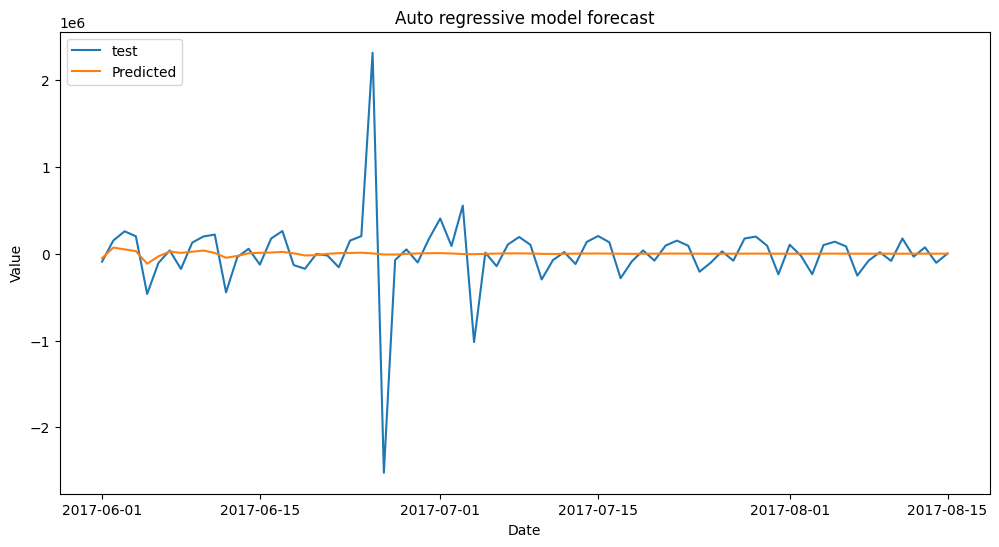

In [178]:
## Visualize results
plt.figure(figsize=(12, 6))
plt.plot(test_set.index, test_set["sale_diff"], label='test')
plt.plot(Forecast, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc="upper left")
plt.title("Auto regressive model forecast")
plt.show()

#### findings about the AR model
- We can see that the Autoregressive model prediction is not the same as the test model.
- The prediction are not that accurate

### **ARIMA MODEL**(AutoRegressive Intergrated Moving Average)

In [138]:

step_wise_fit= auto_arima(train_set["sale_diff"],
                          seasonal=True,
                          m=7,
                          stepwise=True,
                          suppress_warnings=True)

step_wise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1611
Model:             SARIMAX(3, 0, 2)x(1, 0, [1], 7)   Log Likelihood              -21678.900
Date:                             Mon, 20 May 2024   AIC                          43375.799
Time:                                     22:27:50   BIC                          43424.260
Sample:                                 01-02-2013   HQIC                         43393.788
                                      - 05-31-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1347.6450    327.084      4.120      0.000     706.572    1988.718
ar.L1         -0.5960      0.081     -7.324      0.000      -0.755      -0.436
ar.L2          0.0314      0.031      1.006      0.314      -0.030       0.093
ar.L3         -0.1022      0.023     -4.496      0.000      -0.147      -0.058
ma.L1         -0.1133      0.080     -1.421      0.155      -0.270       0.043
ma.L2         -0.5381      0.075     -7.217      0.000      -0.684      -0.392
ar.S.L7        0.9693      0.007    145.764      0.000       0.956       0.982
ma.S.L7       -0.8320      0.018    -46.012      0.000      -0.867      -0.797
sigma2       3.11e+10      0.000   2.32e+14      0.000    3.11e+10    3.11e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             64931.85
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               6.54   Skew:                             2.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.35e+29. Standard errors may be unstable.
"""

In [179]:
# Fit an ARIMA model with differencing order 1 (i.e., first difference)
model = ARIMA(train_set["sale_diff"], order=(4, 0, 2))
model_ARIMA = model.fit()
warnings.filterwarnings("default")
model_ARIMA.summary()

c:\Users\USER\Desktop\LP3_Time_Series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\USER\Desktop\LP3_Time_Series\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\USER\Desktop\LP3_Time_Series\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              sale_diff   No. Observations:                 1611
Model:                 ARIMA(4, 0, 2)   Log Likelihood              -21869.800
Date:                Mon, 20 May 2024   AIC                          43755.601
Time:                        23:06:13   BIC                          43798.677
Sample:                    01-02-2013   HQIC                         43771.591
                         - 05-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        531.0680    422.105      1.258      0.208    -296.243    1358.379
ar.L1         -0.3829      0.529     -0.724      0.469      -1.420       0.654
ar.L2          0.0475      0.135      0.353      0.724      -0.216       0.311
ar.L3         -0.2245      0.061     -3.708      0.000      -0.343      -0.106
ar.L4         -0.0840      0.086     -0.973      0.330      -0.253       0.085
ma.L1         -0.2665      0.526     -0.507      0.612      -1.297       0.764
ma.L2         -0.5819      0.477     -1.220      0.222      -1.516       0.353
sigma2      3.106e+10      0.000   1.02e+14      0.000    3.11e+10    3.11e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):             25175.09
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               5.12   Skew:                             2.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.11e+29. Standard errors may be unstable.
"""

In [180]:
fc = model_ARIMA.predict(start=len(train_set["sale_diff"]), end=len(train_set["sale_diff"])+len(test_set["sale_diff"])-1, dynamic=False)

## Evaluate model using the metrics
mse = mean_squared_error(test_set["sale_diff"], fc)
mae = mean_absolute_error(test_set["sale_diff"],fc)
rmse = np.sqrt(mse).round(1)

scores=pd.DataFrame([["ARIMA",mse,mae,rmse]], columns=["model_fit", "mse","mae","rmse"])
results= pd.concat([result,scores], axis=0, ignore_index=True)
results

,model_fit,mse,mae,rmse
0,AR,1.939122e+11,205870.906276,440354.58
1,ARIMA,1.985078e+11,214772.085217,445542.10


Text(0.5, 1.0, 'ARIMA model forecast')

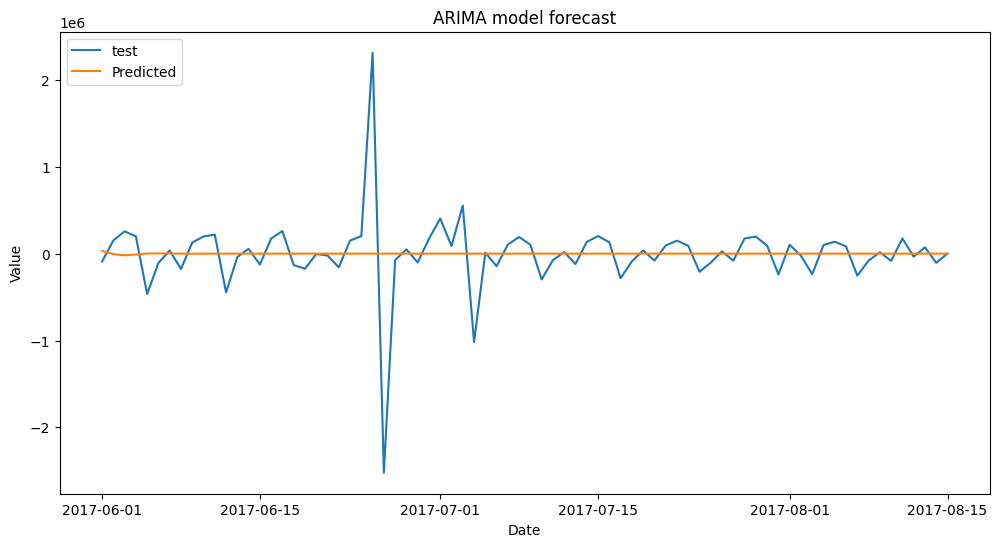

In [141]:
## Visualize results
plt.figure(figsize=(12, 6))
# plt.plot(trains_set.index, trains_set["sale_diff"], label='Original')
plt.plot(test_set.index, test_set["sale_diff"], label='test')
plt.plot(fc, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc="upper left")
plt.title("ARIMA model forecast")

#### Findings of the ARIMA model
- The predictions are not accurate compared to the test data
- Doing worse that the AR model

### **SARIMAX MODEL**(Seasonal AutoRegressive Intergrated Moving Averages with Exogeneous variables)

In [193]:
# Fit an SARIMA model with differencing order 1 
model = SARIMAX(train_set["sale_diff"], order=(4, 0, 2),seasonal_order=(1,0,2,7))
model_SARIMA = model.fit()
warnings.filterwarnings("default")
model_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         sale_diff   No. Observations:                 1611
Model:             SARIMAX(4, 0, 2)x(1, 0, 2, 7)   Log Likelihood              -21616.235
Date:                           Mon, 20 May 2024   AIC                          43252.471
Time:                                   23:18:51   BIC                          43306.317
Sample:                               01-02-2013   HQIC                         43272.459
                                    - 05-31-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3337      0.192     -1.734      0.083      -0.711       0.044
ar.L2          0.1818      0.048      3.814      0.000       0.088       0.275
ar.L3         -0.0119      0.029     -0.411      0.681      -0.069       0.045
ar.L4          0.0412      0.026      1.599      0.110      -0.009       0.092
ma.L1         -0.4086      0.189     -2.168      0.030      -0.778      -0.039
ma.L2         -0.5021      0.182     -2.762      0.006      -0.858      -0.146
ar.S.L7        0.9994      0.001    837.376      0.000       0.997       1.002
ma.S.L7       -0.8603      0.022    -39.206      0.000      -0.903      -0.817
ma.S.L14      -0.1126      0.022     -5.157      0.000      -0.155      -0.070
sigma2      3.106e+10   2.58e-12   1.21e+22      0.000    3.11e+10    3.11e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             88755.48
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.97   Skew:                             3.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.44e+38. Standard errors may be unstable.
"""

In [194]:
y_pred = model_SARIMA.predict(start=len(train_set["sale_diff"]), end=len(train_set["sale_diff"])+len(test_set["sale_diff"])-1, dynamic=False)

## Evaluate model using the metrics
mse = mean_squared_error(test_set["sale_diff"], y_pred)
mae = mean_absolute_error(test_set["sale_diff"],y_pred)
rmse = np.sqrt(mse).round(1)

score=pd.DataFrame([["SARIMAX",mse,mae,rmse]], columns=["model_fit", "mse","mae" ,"rmse"])
results= pd.concat([results, score], axis=0, ignore_index=True)
results

,model_fit,mse,mae,rmse
0,AR,1.939122e+11,205870.906276,440354.580000
1,ARIMA,1.985078e+11,214772.085217,445542.100000
2,XGB,6.688306e+10,228642.977930,258617.600000
3,linear,2.733031e+10,124057.284785,165318.800084
4,SARIMAX,1.635035e+11,138874.234170,404355.700000


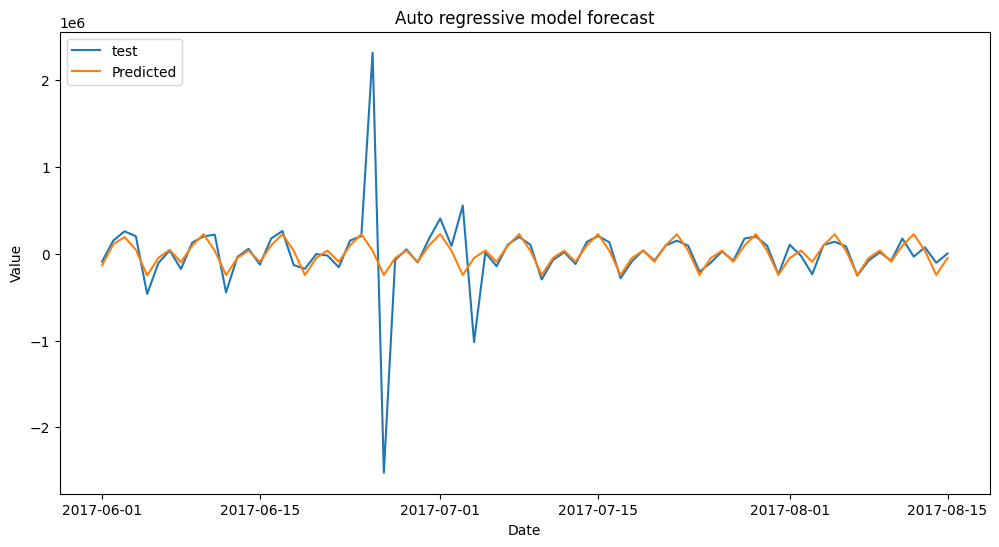

In [195]:
## Visualize results
plt.figure(figsize=(12, 6))
plt.plot(test_set.index, test_set["sale_diff"], label='test')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc="upper left")
plt.title("Auto regressive model forecast")
plt.show()

### findings for the Sarimax model
- Predictions are almost accurate
- Doing better than ARIMA and AR 

### **Modelling With Traditional Models**

### **XGBOOST MODEL**

In [181]:
## fit the model into a pipeline
xgb_pipeline=Pipeline(steps=[
        ('preprocessor', preprocessor),
        ("xgb", XGBRegressor(objective='reg:squarederror', n_estimators=100))
])

In [182]:
# Train the model
xgb_pipeline.fit(X_train, y_train)

# Make predictions on the testing set
pred = xgb_pipeline.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, pred)
mae= mean_absolute_error(y_test, pred)
rmse= np.sqrt(mse).round(2)
metrics= pd.DataFrame([["XGB", mse, mae, rmse,]], columns=["model_fit", "mse", "mae","rmse",])
metrics
results= pd.concat([results,metrics], axis=0, ignore_index=True)
results

,model_fit,mse,mae,rmse
0,AR,1.939122e+11,205870.906276,440354.58
1,ARIMA,1.985078e+11,214772.085217,445542.10
2,XGB,6.688306e+10,228642.977930,258617.60


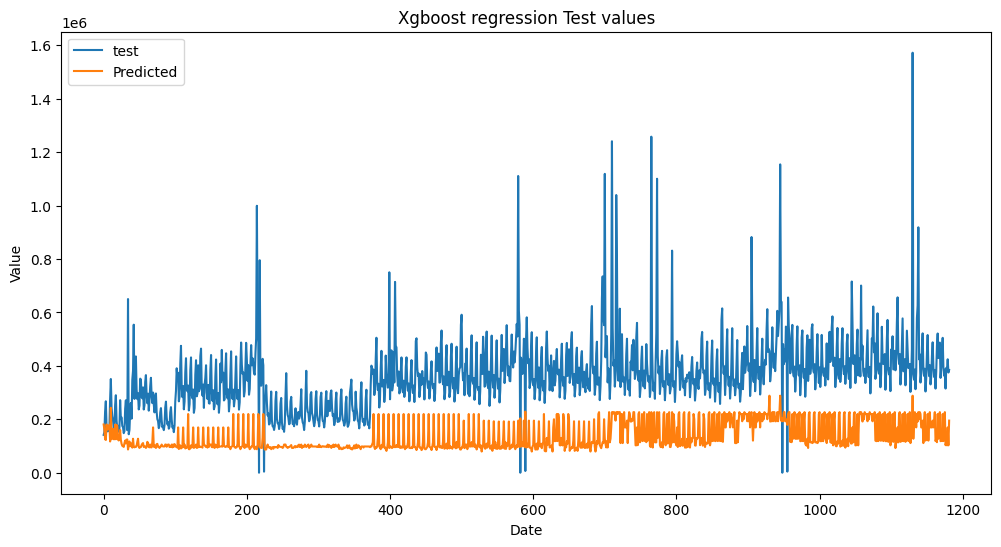

In [183]:
## Visualize results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='test')
plt.plot(pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc="upper left")
plt.title("Xgboost regression Test values")
plt.show()

### **LINEAR REGRESSION**

In [184]:
## Fit the pipeline with the regression model
lg_pipeline=Pipeline(steps=[
        ('preprocessor', preprocessor),
        ("linear",LinearRegression())])

In [185]:
lg_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('numerical_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['onpromotion'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['family'], dtype='object'))])),
                ('linear', LinearRegression())])

In [186]:
# Train the model
lg_pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lg_pipeline.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


metric= pd.DataFrame([["linear", mse, mae, rmse]], columns=["model_fit", "mse", "mae", "rmse"])
results= pd.concat([results, metric],axis=0, ignore_index=True)
results


,model_fit,mse,mae,rmse
0,AR,1.939122e+11,205870.906276,440354.580000
1,ARIMA,1.985078e+11,214772.085217,445542.100000
2,XGB,6.688306e+10,228642.977930,258617.600000
3,linear,2.733031e+10,124057.284785,165318.800084


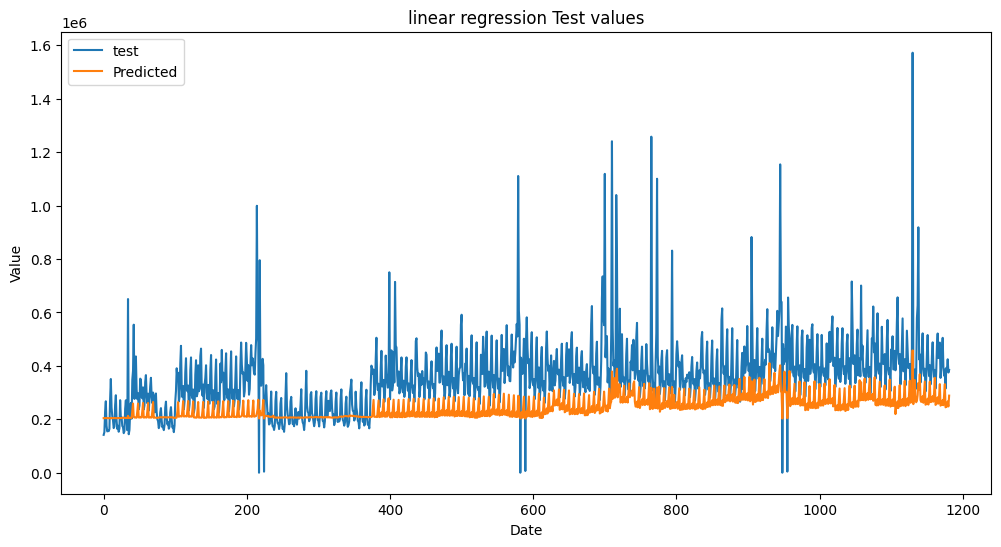

In [187]:
## Visualize results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='test')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc="upper left")
plt.title("linear regression Test values")
plt.show()

Findings

- Our models are fitting the model well. We can see that Xgboost is outstanding with the average distance between the observed values and predicted values of 2604.62. From the visualization we can see that it has been able to predict the sales values from 2017 onwards.

- In our statistical models, SARIMAX was the best model performing with an RMSE score of 83681.80 with its visualization showcasing its ability to predict sales over time on an accurate prediction.

- Autoreg was the second best statistical model being able to predict with an RMSE score of 150602.89 and the visualization demonstrating the model being able to predict the first few yrs and months after which it slacked.

#### MODEL EVALUATION

In [188]:
## lets make sure that the data is a daily data
datatrain= train.asfreq("D")
datatrain
trained= datatrain["sale_diff"]
trained.head()

date
2013-01-02    493580.798945
2013-01-03   -134631.186820
2013-01-04     -7001.554031
2013-01-05    122890.444136
2013-01-06     42345.279859
Freq: D, Name: sale_diff, dtype: float64

In [189]:
end_train = '2017-06-01'
print(
    f"Train dates : {datatrain.index.min()} --- {datatrain.loc[:end_train].index.max()}  "
    f"(n={len(datatrain.loc[:end_train])})"
)
print(
    f"Test dates  : {datatrain.loc[end_train:].index.min()} --- {datatrain.loc[:].index.max()}  "
    f"(n={len(datatrain.loc[end_train:])})"
)
data_train = datatrain.loc[:end_train]
data_test  = datatrain.loc[end_train:]

Train dates : 2013-01-02 00:00:00 --- 2017-06-01 00:00:00  (n=1612)
Test dates  : 2017-06-01 00:00:00 --- 2017-08-15 00:00:00  (n=76)


In [ ]:
models = {
        'XGBoost': XGBRegressor(objective='reg:squarederror', n_estimators=100),
        'Linear regression': LinearRegression()
    }

### **HYPERPARAMETER TUNING**

In [206]:
xgb_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'xgb', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numerical_pipeline', 'preprocessor__categorical_pipeline', 'preprocessor__numerical_pipeline__memory', 'preprocessor__numerical_pipeline__steps', 'preprocessor__numerical_pipeline__verbose', 'preprocessor__numerical_pipeline__numerical_imputer', 'preprocessor__numerical_pipeline__scaler', 'preprocessor__numerical_pipeline__numerical_imputer__add_indicator', 'preprocessor__numerical_pipeline__numerical_imputer__copy', 'preprocessor__numerical_pipeline__numerical_imputer__fill_value', 'preprocessor__numerical_pipeline__numerical_imputer__keep_empty_features', 'preprocessor__numerical_pipeline__numerical_imputer__missing_values', 'preprocessor__numerical_pipeline__numerical_imputer__strategy', '

In [207]:
param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.1, 0.5, 1],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__gamma': [0, 0.1, 0.5],
    'xgb__subsample': [0.5, 0.8, 1],
    'xgb__colsample_bytree': [0.5, 0.8, 1],
    'xgb__reg_alpha': [0, 0.1, 0.5],
    'xgb__reg_lambda': [0, 0.1, 0.5]
}

In [208]:
xgbmodel= xgb_pipeline.fit(X_train, y_train)

In [ ]:
# Function for walk forward validation with time series data
def walk_forward_validation(data, n_train, n_test, step_size, params):
    predictions = []
    for i in range(n_train, len(data), step_size):
        train_data = data.iloc[:i]
        test_data = data.iloc[i:i+n_test]
        model = XGBRegressor(**params)
        model.fit(train_data.drop('value', axis=1), train_data['value'])
        y_pred = model.predict(test_data.drop('value', axis=1))
        predictions.extend(y_pred)
    return np.array(predictions)

In [211]:
param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.1, 0.5, 1],
    'xgb__n_estimators': [100, 200, 300],
    'xgb__subsample': [0.5, 0.7, 1],
    
}

# Time series split
tscv = TimeSeriesSplit(n_splits=5)
scoring={"rmse":make_scorer(mean_squared_error, response_method="predict", greater_is_better=False)}
# Grid search
grid = GridSearchCV(estimator=xgbmodel,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=tscv,
                    verbose=1,
                    refit="rmse",
                    n_jobs=-1
                    )
grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.5}


In [212]:
## fit your best hyperparameters
predictions = grid.predict(X_test)
mse= mean_squared_error(y_test,predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root mean squared Error: { rmse:.2f}')

metrics_table= pd.DataFrame([["XGB", mse, mae, rmse]], columns=["model_fit", "mse", "mae", "rmse"])
metrics_table

Mean Squared Error: 51283579387.11
Mean Absolute Error: 189174.52
Root mean squared Error: 226458.78


,model_fit,mse,mae,rmse
0,XGB,5.128358e+10,189174.516267,226458.780768


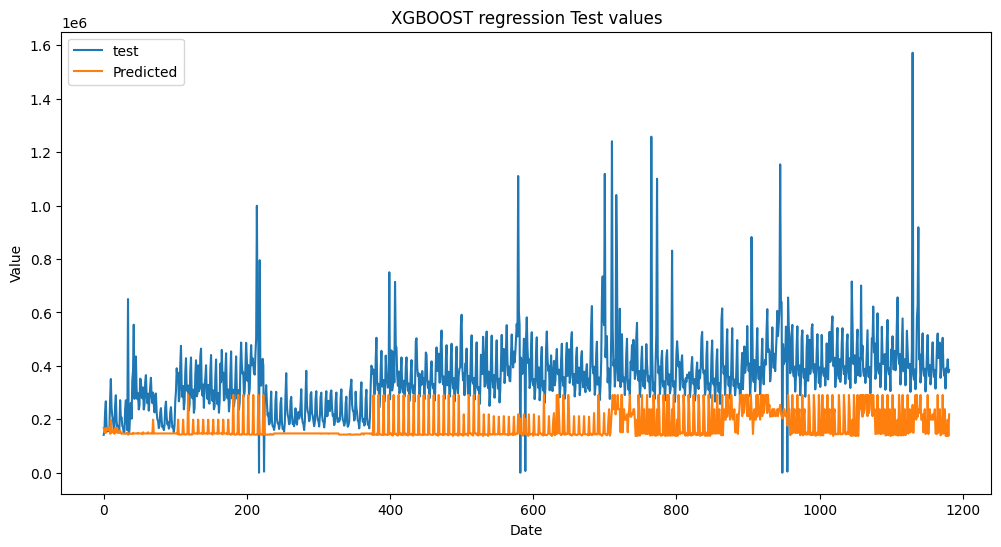

In [213]:


## Visualize results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='test')
plt.plot(predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc="upper left")
plt.title("XGBOOST regression Test values")
plt.show()


### Feature Importance

In [214]:
# Get the feature importances
importances = xgb_pipeline.named_steps['xgb'].feature_importances_

# Print the feature importances
print(importances)

## Generate features out 
features= xgb_pipeline.named_steps['preprocessor'].named_transformers_["categorical_pipeline"].named_steps["encoder"]
num_features= numerical_columns
cat_feat= features.get_feature_names_out(categorical_columns)
feature_names=  list(num_features) + list(cat_feat)
feature_names

[0.02234873 0.01428333 0.0221811  0.03753245 0.02988788 0.06629711
 0.0955032  0.7119662 ]


['onpromotion',
 'family_CELEBRATION',
 'family_Hygiene',
 'family_School_appliances',
 'family_animal_produce',
 'family_appliences',
 'family_drinks',
 'family_plant_produce']

In [215]:
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances.sort_values(by="Importance", ascending=False)

,Feature,Importance
7,family_plant_produce,0.711966
6,family_drinks,0.095503
5,family_appliences,0.066297
3,family_School_appliances,0.037532
4,family_animal_produce,0.029888
0,onpromotion,0.022349
2,family_Hygiene,0.022181
1,family_CELEBRATION,0.014283


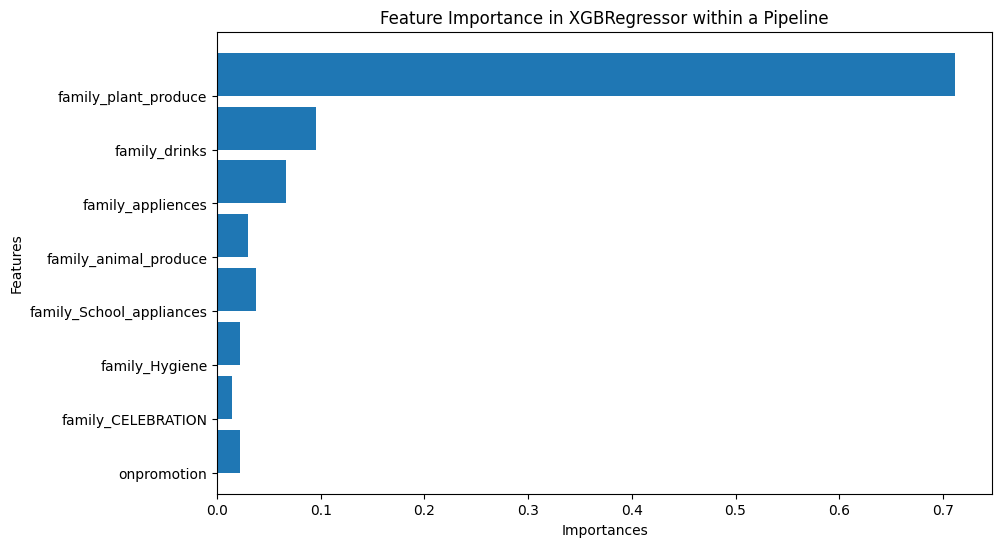

In [216]:
# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances["Feature"], importances, align='edge')
plt.xlabel('Importances')
plt.ylabel('Features')
plt.title('Feature Importance in XGBRegressor within a Pipeline')
plt.show()

### **save the model**

In [257]:
destination= "./toolkit"

## Create a directory path if none
if not os.path.exists(destination):
    os.makedirs(destination)
    
## Save the models
models= {
    "pipeline": xgb_pipeline,
    "model":xgbmodel
}
for name,model in models.items():
    file_path= os.path.join(destination, f"{name}.joblib")
    joblib.dump(model, file_path)

In [258]:
# Save model
joblib.dump(model_SARIMA, filename='sarima.py')

['sarima.py']

### Test Data

In [272]:
test_data= pd.read_csv(r'C:\Users\USER\Desktop\LP3_Time_Series\datasets\test.csv')
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [273]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [274]:
test_data['date'] = pd.to_datetime(test_data['date'])

In [282]:
def regroup_family(test_):
    test_data['family'].replace(to_replace={'AUTOMOTIVE','PLAYERS AND ELECTRONICS','HOME APPLIANCES','HARDWARE','LAWN AND GARDEN', 'HOME AND KITCHEN I', 'HOME AND KITCHEN II'},value='appliences',inplace=True)
    test_data['family'].replace(to_replace={'SCHOOL AND OFFICE SUPPLIES','MAGAZINES', 'BOOKS'},value='School_appliances',inplace=True)
    test_data['family'].replace(to_replace={'BEVERAGES','LIQUOR,WINE,BEER'},value='drinks',inplace=True)
    test_data['family'].replace(to_replace={'BABY CARE', 'BEAUTY','CLEANING','HOME CARE', 'LADIESWEAR','PERSONAL CARE','LINGERIE'},value='Hygiene',inplace=True)
    test_data['family'].replace(to_replace={'BREAD/BAKERY','GROCERY I', 'GROCERY II','PREPARED FOODS','PRODUCE','PET SUPPLIES'},value='plant_produce',inplace=True)
    test_data['family'].replace(to_replace={'DAIRY', 'DELI', 'EGGS','FROZEN FOODS','MEATS','POULTRY','SEAFOOD'},value='animal_produce',inplace=True)

regroup_family(test_data)

In [283]:
test_data['family'].unique()

array(['appliences', 'Hygiene', 'drinks', 'School_appliances',
       'plant_produce', 'CELEBRATION', 'animal_produce'], dtype=object)

In [285]:
 test_data.set_index("date",inplace=True)

In [286]:
new_test= test_data.groupby(["family", pd.Grouper(freq="D")]).agg({ 
                                                                     "onpromotion":"sum",
                                                                    }).reset_index()
new_test

,family,date,onpromotion
0,CELEBRATION,2017-08-16,0
1,CELEBRATION,2017-08-17,1
2,CELEBRATION,2017-08-18,0
3,CELEBRATION,2017-08-19,2
4,CELEBRATION,2017-08-20,0
...,...,...,...
107,plant_produce,2017-08-27,5027
108,plant_produce,2017-08-28,3448
109,plant_produce,2017-08-29,6111
110,plant_produce,2017-08-30,11770


In [287]:
new_test=new_test.set_index("date")

In [288]:

loaded_model= joblib.load('toolkit\model.joblib')

predictions= loaded_model.predict(new_test)
predictions

array([1.90549530e+02, 6.99556030e+02, 1.90549530e+02, 8.79599426e+02,
       1.90549530e+02, 1.90549530e+02, 6.99556030e+02, 6.99556030e+02,
       1.90549530e+02, 6.99556030e+02, 1.90549530e+02, 1.90549530e+02,
       1.90549530e+02, 8.79599426e+02, 1.04107996e+03, 9.08883789e+02,
       1.17922523e+05, 1.01190625e+05, 1.11183008e+05, 9.60413125e+04,
       9.60413125e+04, 1.02134836e+05, 9.29309297e+04, 1.06136758e+05,
       9.29309297e+04, 1.11183008e+05, 9.60413125e+04, 9.72774688e+04,
       1.11940469e+05, 1.11183008e+05, 1.07342891e+05, 1.00486547e+05,
       1.10625703e+04, 1.11578015e+03, 4.16049170e+03, 4.37137988e+03,
       2.74466724e+03, 5.55863609e+01, 3.59293506e+03, 3.65174634e+03,
       2.93651978e+03, 3.59293506e+03, 2.74466724e+03, 3.65174634e+03,
       3.65174634e+03, 2.74466724e+03, 2.74466724e+03, 3.65174634e+03,
       1.16260367e+05, 1.13449141e+05, 1.39591625e+05, 1.17631078e+05,
       1.39717438e+05, 1.41841938e+05, 1.30700891e+05, 1.11654438e+05,
      

In [289]:
##test
final_test= pd.DataFrame({"sales_predictions":predictions}, index=new_test.index)
final_test

,sales_predictions
date,
2017-08-16,190.549530
2017-08-17,699.556030
2017-08-18,190.549530
2017-08-19,879.599426
2017-08-20,190.549530
...,...
2017-08-27,219712.187500
2017-08-28,118411.046875
2017-08-29,191634.625000
